In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
pip install scikit-learn==1.2.2


In [43]:
data = pd.read_csv('/content/train.csv')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

In [45]:
missing_values = data.isnull().sum()
print("\nNilai yang Hilang per Kolom:")
print(missing_values)


Nilai yang Hilang per Kolom:
hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
country                             346
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11404
company   

## EDA

<ipython-input-46-e0d705a9a4c8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancel_distribution.index, y=cancel_distribution.values, palette='viridis')


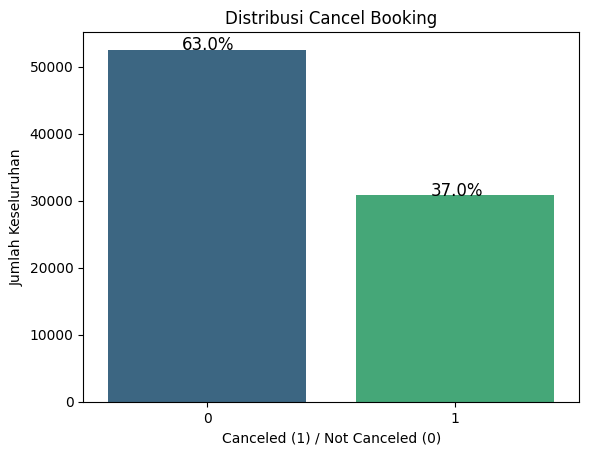

In [46]:

# Distribusi variabel target (is_canceled)
cancel_distribution = data['is_canceled'].value_counts()
total_bookings = len(data)  # Calculate total number of bookings
ax = sns.barplot(x=cancel_distribution.index, y=cancel_distribution.values, palette='viridis')

# Add percentage annotations to bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_bookings)
    x = p.get_x() + p.get_width() / 2 - 0.1  # Adjust annotation position
    y = p.get_y() + p.get_height()           # Adjust annotation position
    ax.annotate(percentage, (x, y), size=12)  # Add annotation

plt.title('Distribusi Cancel Booking')
plt.xlabel('Canceled (1) / Not Canceled (0)')
plt.ylabel('Jumlah Keseluruhan')
plt.show()

Menunjukkan bahwa pembatalan merupakan masalah signifikan yang perlu diperhatikan.

- Mengembangkan kebijakan pembatalan lebih ketat, seperti penalti atau pengurangan deposit untuk mencegah pembatalan.

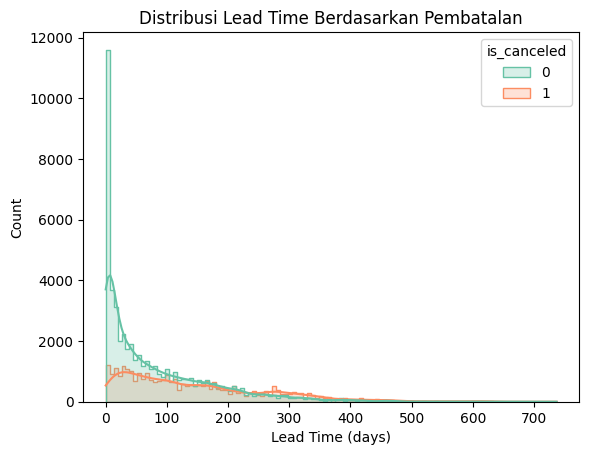

In [47]:
# Analisis lead_time terhadap pembatalan
sns.histplot(data=data, x='lead_time', hue='is_canceled', kde=True, element='step', palette='Set2')
plt.title('Distribusi Lead Time Berdasarkan Pembatalan')
plt.xlabel('Lead Time (days)')
plt.ylabel('Count')
plt.show()


Lead time yang panjang memiliki kecenderungan pembatalan lebih tinggi.

- Memprioritaskan komunikasi proaktif kepada pelanggan dengan lead time panjang untuk mengurangi risiko pembatalan.

<ipython-input-48-a176ab4beed1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_by_month.index, y=cancel_by_month.values, palette='Blues')


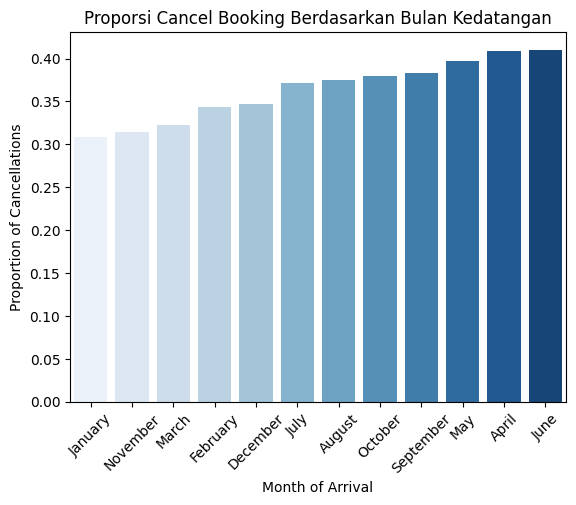

In [48]:
# Analisis bulan kedatangan terhadap pembatalan
cancel_by_month = data.groupby('arrival_date_month')['is_canceled'].mean().sort_values()
sns.barplot(x=cancel_by_month.index, y=cancel_by_month.values, palette='Blues')
plt.title('Proporsi Cancel Booking Berdasarkan Bulan Kedatangan')
plt.xlabel('Month of Arrival')
plt.ylabel('Proportion of Cancellations')
plt.xticks(rotation=45)
plt.show()


Tingkat pembatalan lebih tinggi pada musim ramai atau liburan.
- Memberikan harga lebih kompetitif di musim ramai untuk mencegah pembatalan.

<ipython-input-49-3d199cc281d9>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_guests', y='cancellation_rate', data=canceled_data, palette='muted')


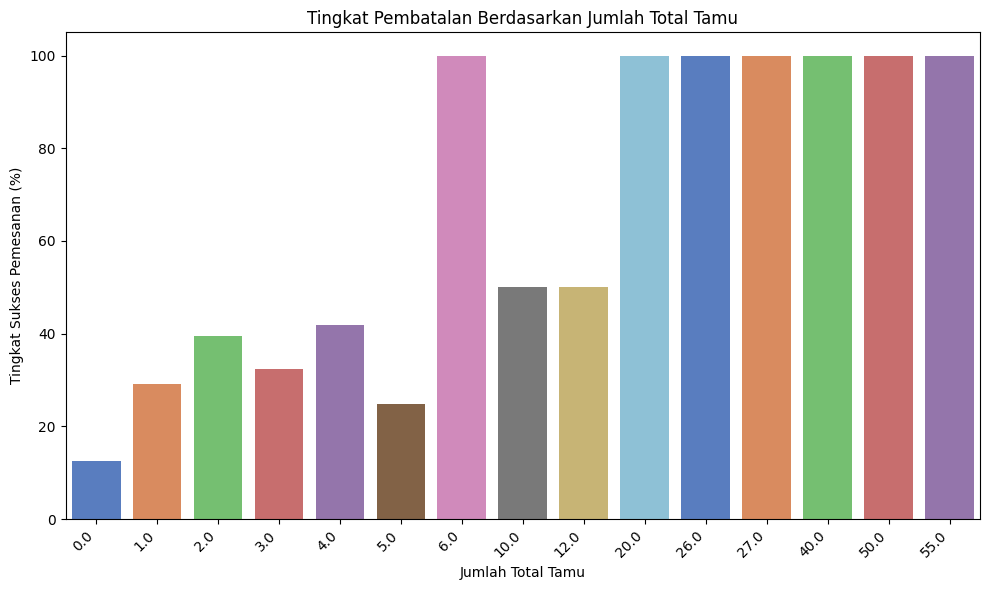

In [49]:
data['total_guests'] = data['adults'] + data['children'] + data['babies']

# Group data by total guests and cancellation status
grouped_data = data.groupby(['total_guests', 'is_canceled'])['hotel'].count().reset_index()
grouped_data = grouped_data.rename(columns={'hotel': 'count'})

# Calculate cancellation rate for each group
total_guests_counts = grouped_data.groupby('total_guests')['count'].sum().reset_index()
grouped_data = pd.merge(grouped_data, total_guests_counts, on='total_guests')
grouped_data['cancellation_rate'] = (grouped_data['count_x'] / grouped_data['count_y']) * 100

# Filter for canceled bookings (is_canceled = 1)
canceled_data = grouped_data[grouped_data['is_canceled'] == 1]

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
sns.barplot(x='total_guests', y='cancellation_rate', data=canceled_data, palette='muted')
plt.title('Tingkat Pembatalan Berdasarkan Jumlah Total Tamu')
plt.xlabel('Jumlah Total Tamu')
plt.ylabel('Tingkat Sukses Pemesanan (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


Pembatalan lebih sering terjadi pada pemesanan dengan tamu dalam jumlah kecil.
- Memberikan insentif untuk pemesanan grup kecil, seperti paket tambahan atau diskon.


<ipython-input-50-5fe08466135b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_by_customer_type.index, y=cancel_by_customer_type.values, palette='pastel')


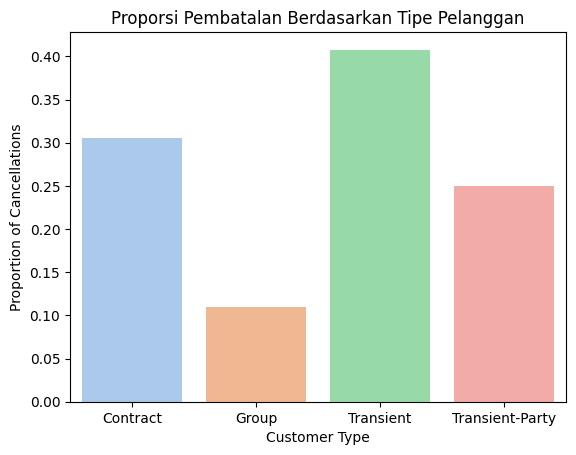

In [50]:
# Hubungan antara tipe pelanggan dan pembatalan
cancel_by_customer_type = data.groupby('customer_type')['is_canceled'].mean()
sns.barplot(x=cancel_by_customer_type.index, y=cancel_by_customer_type.values, palette='pastel')
plt.title('Proporsi Pembatalan Berdasarkan Tipe Pelanggan')
plt.xlabel('Customer Type')
plt.ylabel('Proportion of Cancellations')
plt.show()


Tipe pelanggan Transient (pelanggan individu) memiliki tingkat pembatalan lebih tinggi dibandingkan tipe lainnya, seperti Group atau Contract.


- Menargetkan pelanggan Transient dengan insentif, seperti paket harga diskon atau layanan tambahan.

<ipython-input-51-96781679ef2f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_visitors.values, y=country_visitors.index, palette='coolwarm', ax=ax)


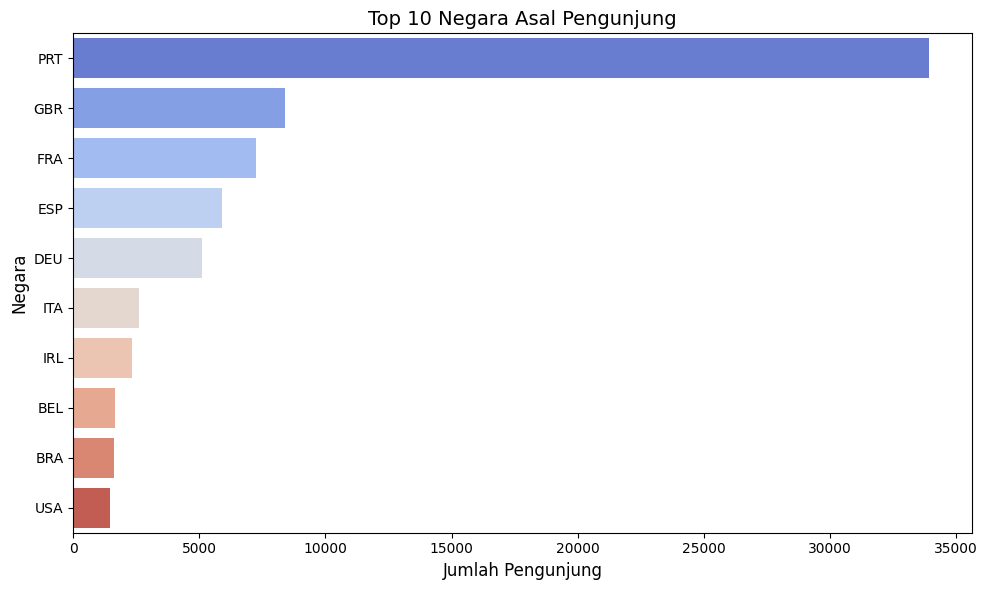

In [51]:
# Visualisasi negara asal pengunjung
# Menghitung jumlah pengunjung berdasarkan negara
country_visitors = data['country'].value_counts().head(10)  # Top 10 countries

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=country_visitors.values, y=country_visitors.index, palette='coolwarm', ax=ax)
ax.set_title('Top 10 Negara Asal Pengunjung', fontsize=14)
ax.set_xlabel('Jumlah Pengunjung', fontsize=12)
ax.set_ylabel('Negara', fontsize=12)
plt.tight_layout()
plt.show()


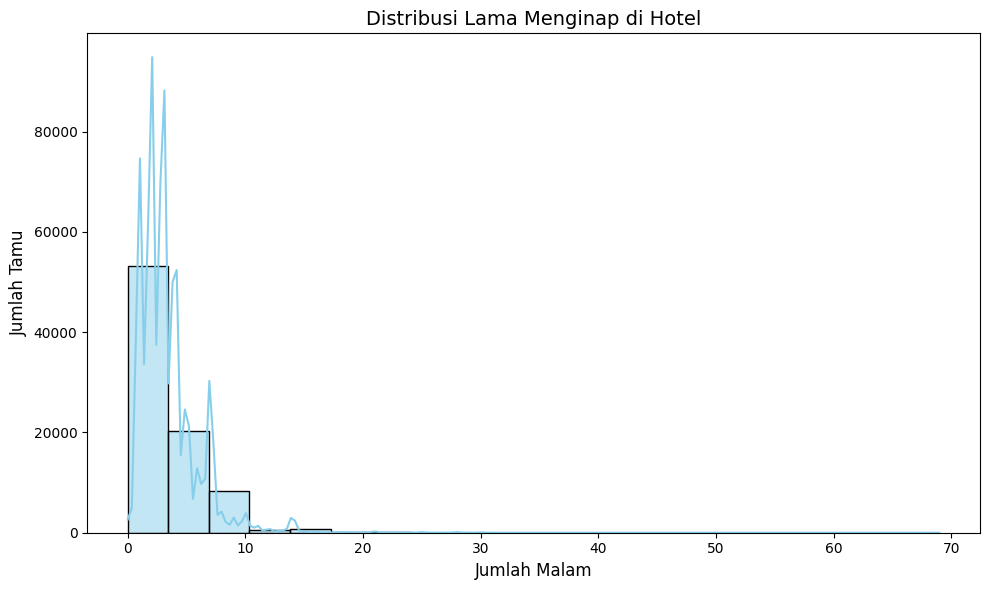

In [52]:
# Hitung total lama menginap (weekday + weekend)
data['total_stays'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

# Visualisasi distribusi lama menginap
plt.figure(figsize=(10, 6))
sns.histplot(data['total_stays'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Lama Menginap di Hotel', fontsize=14)
plt.xlabel('Jumlah Malam', fontsize=12)
plt.ylabel('Jumlah Tamu', fontsize=12)
plt.tight_layout()
plt.show()

Distribusi lama menginap menunjukkan mayoritas tamu tinggal untuk waktu singkat, seperti 1-3 malam.
- Buat paket promosi untuk memperpanjang durasi menginap, misalnya diskon untuk tamu yang memesan lebih dari 3 malam.

## Cleaning data

In [53]:
missing_values = data.isnull().sum()

# Tampilkan hasil
print("Jumlah Missing Value per Kolom:")
print(missing_values)

Jumlah Missing Value per Kolom:
hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
country                             346
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11404
company 

In [54]:
# Imputasi data
# 1. Imputasi kolom 'children' dengan nilai median (karena numerik dan mungkin ada outlier)
data['children'].fillna(data['children'].median(), inplace=True)  # Impute NaNs in place
data['children'] = pd.to_numeric(data['children'], errors='coerce').astype('Int64')

# 2. Imputasi kolom 'country' dengan modus (karena kategorikal dan mewakili negara asal terbanyak)
# Check if the mode is empty before accessing it
country_mode = data['country'].mode()
print(f"Country Mode: {country_mode}")  # Print the mode for debugging
print(f"Country Mode Index: {country_mode.index}")  # Print the index of the mode
if len(country_mode) > 0:
    # Access the first mode value (which might not be at index 0)
    first_mode_value = country_mode.iloc[0]
    data['country'] = data['country'].fillna(first_mode_value)
else:
    # Handle the case where the mode is empty (e.g., fill with a default value)
    data['country'] = data['country'].fillna('Unknown')  # Replace 'Unknown' with a suitable default

# 3. Imputasi kolom 'agent' dengan nilai 0 (asumsi: tidak menggunakan agen)
data['agent'] = data['agent'].fillna(0)

# 4. Imputasi kolom 'company' dengan nilai 0 (asumsi: tidak menggunakan perusahaan)
data['company'] = data['company'].fillna(0)

# Hitung total lama menginap (weekday + weekend)
data['total_stays'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data['total_guests'].fillna(data['total_guests'].median(), inplace=True)

Country Mode: 0    PRT
Name: country, dtype: object
Country Mode Index: RangeIndex(start=0, stop=1, step=1)


<ipython-input-54-f09c236a7941>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['children'].fillna(data['children'].median(), inplace=True)  # Impute NaNs in place
<ipython-input-54-f09c236a7941>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

In [55]:
missing_values = data.isnull().sum()

# Tampilkan hasil
print("Jumlah Missing Value per Kolom:")
print(missing_values)

Jumlah Missing Value per Kolom:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                   

## Encoding

In [56]:
# 1. Mengubah kolom 'hotel' menjadi numerik


# 2. Mengubah kolom 'arrival_date_month' menjadi numerik (urutan bulan)
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
data['arrival_date_month'] = data['arrival_date_month'].map(month_mapping)

# 3. Mengubah kolom 'meal' menjadi numerik
data['meal'] = data['meal'].map({'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

# 4. Mengubah kolom 'country' menjadi numerik berdasarkan negara paling sering muncul (atau bisa pilih top N)
country_mapping = {k: v for v, k in enumerate(data['country'].value_counts().index, 1)}
data['country'] = data['country'].map(country_mapping)

# 5. Mengubah kolom 'market_segment' menjadi numerik
market_segment_mapping = {k: v for v, k in enumerate(data['market_segment'].value_counts().index, 1)}
data['market_segment'] = data['market_segment'].map(market_segment_mapping)

# 6. Mengubah kolom 'distribution_channel' menjadi numerik
distribution_channel_mapping = {k: v for v, k in enumerate(data['distribution_channel'].value_counts().index, 1)}
data['distribution_channel'] = data['distribution_channel'].map(distribution_channel_mapping)

# 7. Mengubah kolom 'reserved_room_type' menjadi numerik
room_type_mapping = {k: v for v, k in enumerate(data['reserved_room_type'].value_counts().index, 1)}
data['reserved_room_type'] = data['reserved_room_type'].map(room_type_mapping)

# 8. Mengubah kolom 'assigned_room_type' menjadi numerik
assigned_room_type_mapping = {k: v for v, k in enumerate(data['assigned_room_type'].value_counts().index, 1)}
data['assigned_room_type'] = data['assigned_room_type'].map(assigned_room_type_mapping)

# 9. Mengubah kolom 'deposit_type' menjadi numerik
deposit_type_mapping = {'No Deposit': 0, 'Non Refund': 1, 'Refundable': 2}
data['deposit_type'] = data['deposit_type'].map(deposit_type_mapping)

# 10. Mengubah kolom 'customer_type' menjadi numerik
customer_type_mapping = {'Transient': 0, 'Contract': 1, 'Group': 2, 'Transient-Party': 3}
data['customer_type'] = data['customer_type'].map(customer_type_mapping)

# 11. Mengubah kolom 'reservation_status' menjadi numerik
reservation_status_mapping = {'Check-Out': 0, 'Canceled': 1, 'No-Show': 2}
data['reservation_status'] = data['reservation_status'].map(reservation_status_mapping)


data['arrival_date_year'] = data['arrival_date_year'].map({2019: 0, 2018: 1, 2017: 2})



In [57]:
data.head(10)

hotel  is_canceled  lead_time  \
0                    Crystal Cove, Barbados Barbados            0          8   
1                Greensboro Courtyard Greensboro, NC            1        524   
2   The Westin Peachtree Plaza, Atlanta Atlanta, GA             1        175   
3  Courtyard by Marriott Aberdeen Airport Aberdee...            0          0   
4             W New York – Union Square New York, NY            1         33   
5  Hotel Maria Cristina, San Sebastian San Sebast...            1        395   
6             W New York – Times Square New York, NY            0        205   
7               The Ritz-Carlton, Tokyo Tokyo, Japan            0         52   
8  Marriott Puerto Vallarta Resort & Spa Puerto V...            0         44   
9                  Las Vegas Marriott Las Vegas, NV             1        167   

   arrival_date_year  arrival_date_month  arrival_date_week_number  \
0                  0                   1                         2   
1                  1                  12                        51   
2                  0                   5                        20   
3                  1                  10                        43   
4                  2                   9                        39   
5                  1                   3                        13   
6                  0                   6                        24   
7                  1                   7                        29   
8                  2                  10                        40   
9                  1                   7                        31   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                         10                        0                     4   
1                         15                        0                     2   
2                         19                        1                     2   
3                         17                        1                     0   
4                         26                        2                     3   
5                         21                        1                     2   
6                         13                        0                     4   
7                         12                        0                     2   
8                          3                        4                     6   
9                         29                        0                     2   

   adults  ...  days_in_waiting_list  customer_type     adr  \
0       2  ...                     0              0   38.40   
1       2  ...                     0              0   62.80   
2       2  ...                     0              0  110.00   
3       1  ...                     0              0   45.00   
4       2  ...                     0              0   57.92   
5       2  ...                     0              0   62.80   
6       2  ...                     0              0  150.75   
7       3  ...                     0              0  137.70   
8       2  ...                     0              1   77.84   
9       2  ...                     0              0   94.50   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0                   0   
1                            0                          0                   1   
2                            0                          0                   1   
3                            0                          0                   0   
4                            0                          1                   1   
5                            0                          0                   1   
6                            0                          2                   0   
7                            0                          1                   0   
8                            0                          0                   0   
9                    

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  int64  
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83293 non-null  Int64  
 11  babies                          83293 non-null  int64  
 12  meal                            

In [59]:
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(exclude=['object']).columns

# Membuat dataset baru untuk data kategorikal dan numerik
data_categorical = data[categorical_columns]
data_numerical = data[numerical_columns]

# Drop the 'reservation_status' column from data_numerical
data_numerical = data_numerical.drop('reservation_status', axis=1)

In [60]:
data_numerical.head()

is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0            0          8                  0                   1   
1            1        524                  1                  12   
2            1        175                  0                   5   
3            0          0                  1                  10   
4            1         33                  2                   9   

   arrival_date_week_number  arrival_date_day_of_month  \
0                         2                         10   
1                        51                         15   
2                        20                         19   
3                        43                         17   
4                        39                         26   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        0                     4       2         0  ...   
1                        0                     2       2         0  ...   
2                        1                     2       2         0  ...   
3                        1                     0       1         0  ...   
4                        2                     3       2         0  ...   

   agent  company  days_in_waiting_list  customer_type     adr  \
0  314.0      0.0                     0              0   38.40   
1    1.0      0.0                     0              0   62.80   
2   12.0      0.0                     0              0  110.00   
3    0.0    200.0                     0              0   45.00   
4   16.0      0.0                     0              0   57.92   

   required_car_parking_spaces  total_of_special_requests  bookingID  \
0                            0                          0          1   
1                            0                          0          2   
2                            0                          0          3   
3                            0                          0          4   
4                            0                          1          5   

   total_guests  total_stays  
0           2.0            4  
1           2.0            2  
2           2.0            3  
3           1.0            1  
4           2.0            5  

[5 rows x 32 columns]

In [61]:
data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     83293 non-null  int64  
 1   lead_time                       83293 non-null  int64  
 2   arrival_date_year               83293 non-null  int64  
 3   arrival_date_month              83293 non-null  int64  
 4   arrival_date_week_number        83293 non-null  int64  
 5   arrival_date_day_of_month       83293 non-null  int64  
 6   stays_in_weekend_nights         83293 non-null  int64  
 7   stays_in_week_nights            83293 non-null  int64  
 8   adults                          83293 non-null  int64  
 9   children                        83293 non-null  Int64  
 10  babies                          83293 non-null  int64  
 11  meal                            83293 non-null  int64  
 12  country                         

check bar chart, adr, heatmap, vif

In [62]:
data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     83293 non-null  int64  
 1   lead_time                       83293 non-null  int64  
 2   arrival_date_year               83293 non-null  int64  
 3   arrival_date_month              83293 non-null  int64  
 4   arrival_date_week_number        83293 non-null  int64  
 5   arrival_date_day_of_month       83293 non-null  int64  
 6   stays_in_weekend_nights         83293 non-null  int64  
 7   stays_in_week_nights            83293 non-null  int64  
 8   adults                          83293 non-null  int64  
 9   children                        83293 non-null  Int64  
 10  babies                          83293 non-null  int64  
 11  meal                            83293 non-null  int64  
 12  country                         

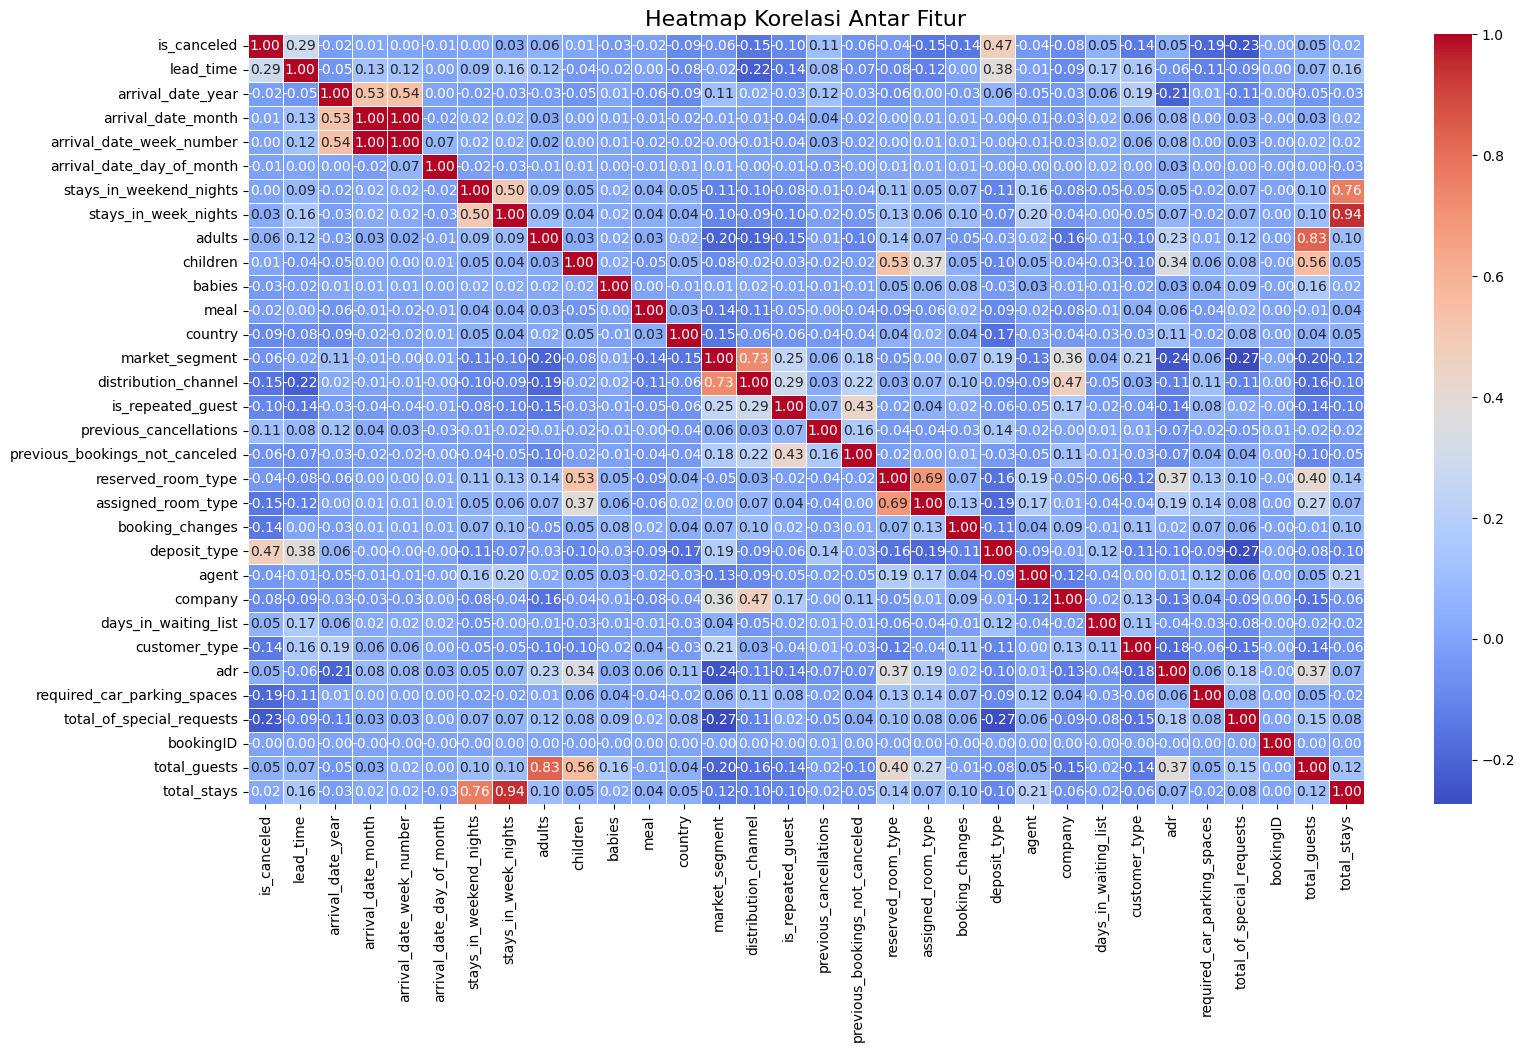

In [63]:
correlation_matrix = data_numerical.corr()

# Plot heatmap
plt.figure(figsize=(18, 10))  # Atur ukuran heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Menambahkan judul
plt.title('Heatmap Korelasi Antar Fitur', fontsize=16)
plt.show()

## Modelling

data test


Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Accuracy: 0.74
F1 Score: 0.57
Recall: 0.46
Precision: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81     10472
           1       0.73      0.46      0.57      6187

    accuracy                           0.74     16659
   macro avg       0.73      0.68      0.69     16659
weighted avg       0.73      0.74      0.72     16659



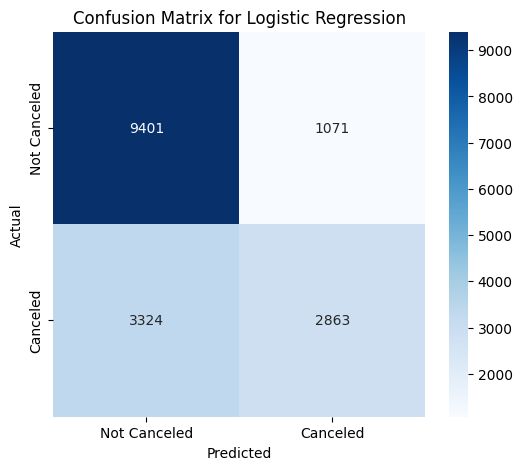

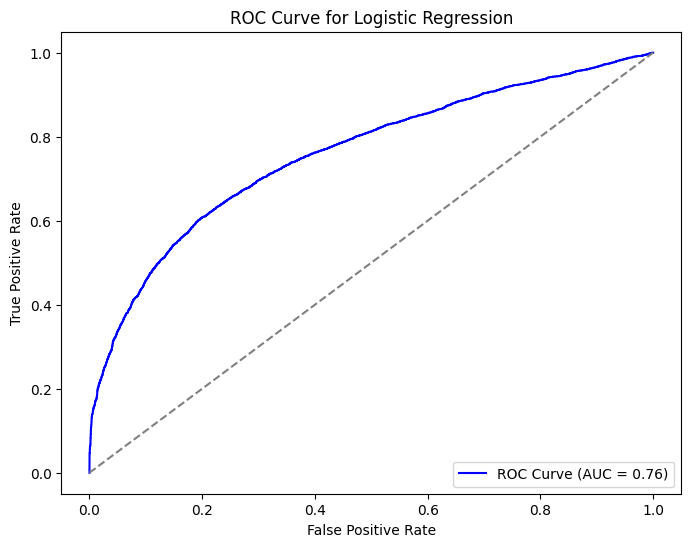


Training K-Nearest Neighbors...
K-Nearest Neighbors Metrics:
Accuracy: 0.63
F1 Score: 0.44
Recall: 0.39
Precision: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72     10472
           1       0.50      0.39      0.44      6187

    accuracy                           0.63     16659
   macro avg       0.59      0.58      0.58     16659
weighted avg       0.61      0.63      0.61     16659



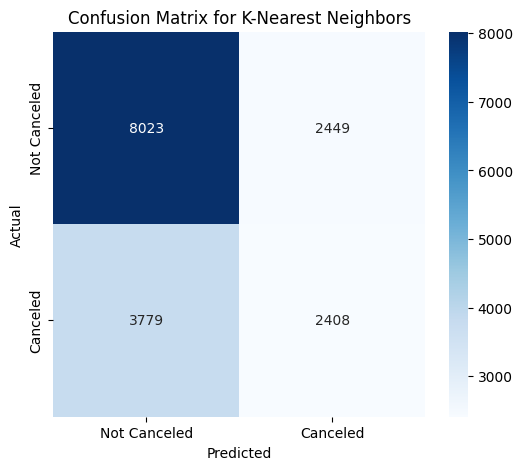

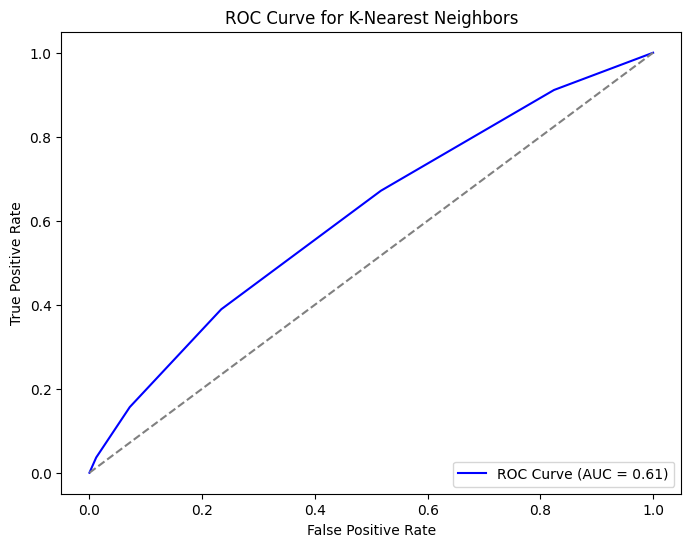


Training Random Forest...
Random Forest Metrics:
Accuracy: 0.89
F1 Score: 0.84
Recall: 0.80
Precision: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     10472
           1       0.88      0.80      0.84      6187

    accuracy                           0.89     16659
   macro avg       0.88      0.87      0.88     16659
weighted avg       0.89      0.89      0.88     16659



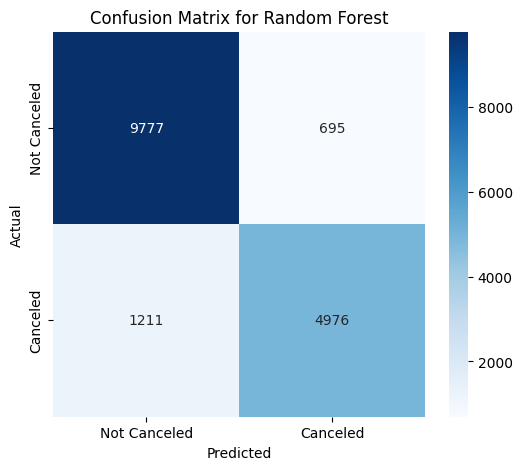

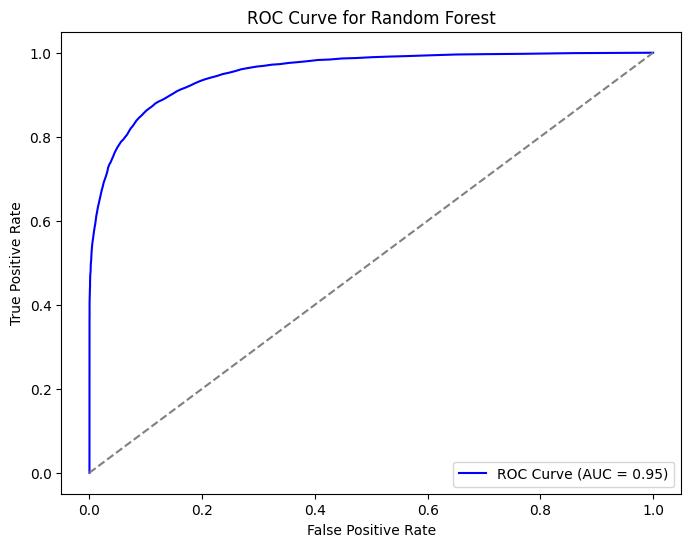


Training Decision Tree...
Decision Tree Metrics:
Accuracy: 0.84
F1 Score: 0.78
Recall: 0.79
Precision: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     10472
           1       0.77      0.79      0.78      6187

    accuracy                           0.84     16659
   macro avg       0.82      0.83      0.83     16659
weighted avg       0.84      0.84      0.84     16659



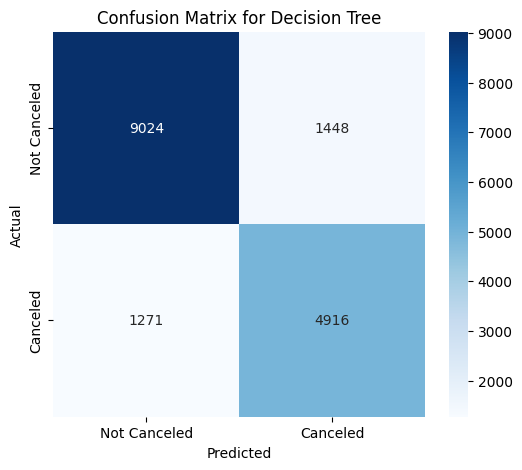

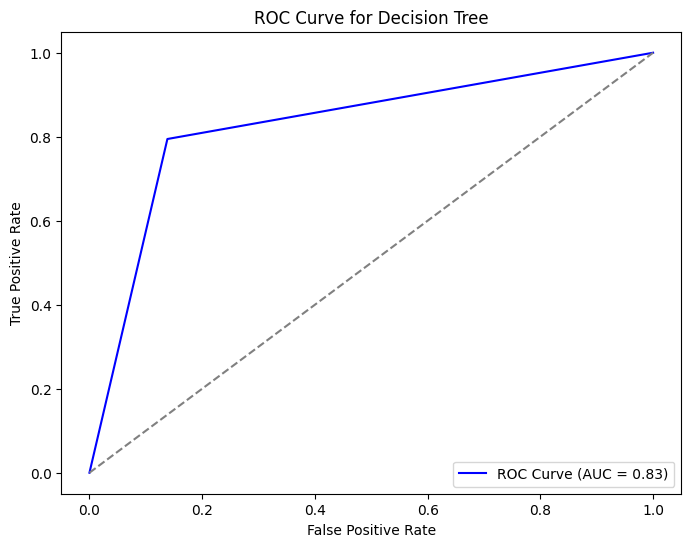


Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:48:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Metrics:
Accuracy: 0.88
F1 Score: 0.84
Recall: 0.82
Precision: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     10472
           1       0.86      0.82      0.84      6187

    accuracy                           0.88     16659
   macro avg       0.88      0.87      0.87     16659
weighted avg       0.88      0.88      0.88     16659



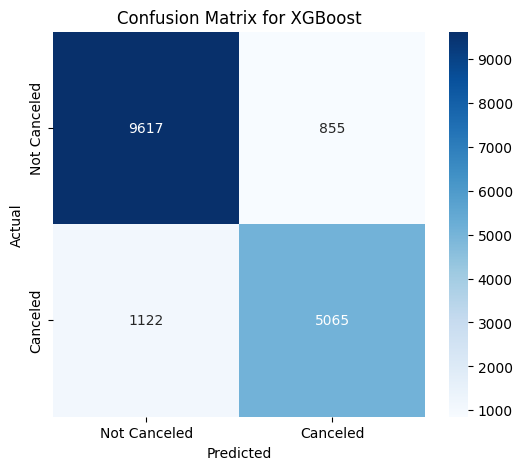

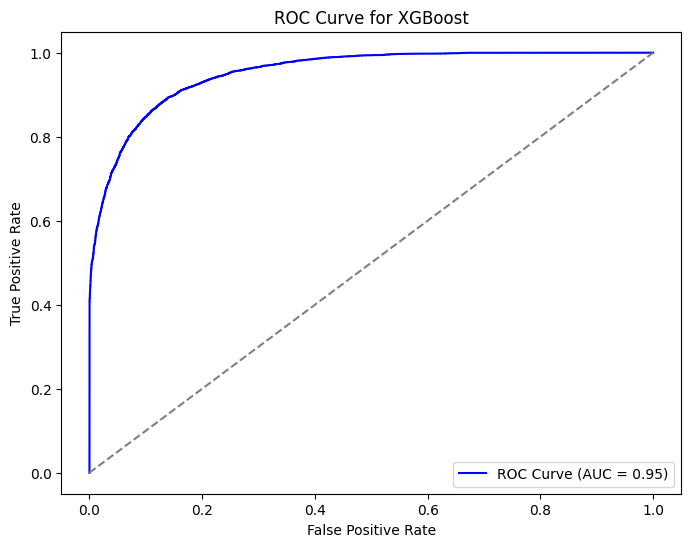

In [64]:
!pip install scikit-learn  # Install scikit-learn if not already installed
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_curve,
    auc,
    classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan fitur dan label
X = data_numerical.drop(columns=['is_canceled'], axis=1)  # Fitur
y = data_numerical['is_canceled']  # Target (kolom 'is_canceled')

# Split dataset ke data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Daftar model untuk dilatih
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Melatih model dan mengevaluasi metrik
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    # Latih model
    model.fit(X_train, y_train)
    # Prediksi
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilitas untuk ROC Curve

    # Evaluasi Metrik
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Canceled", "Canceled"], yticklabels=["Not Canceled", "Canceled"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f"ROC Curve for {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

## Hyperparameter



Tuning Hyperparameter untuk Logistic Regression...
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 15 is smaller than n_iter=20. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:43: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



Best Parameters for Logistic Regression: {'solver': 'newton-cg', 'C': 100}

Evaluating Logistic Regression...

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85     10472
           1       0.84      0.56      0.67      6187

    accuracy                           0.80     16659
   macro avg       0.81      0.75      0.76     16659
weighted avg       0.80      0.80      0.79     16659


Confusion Matrix:


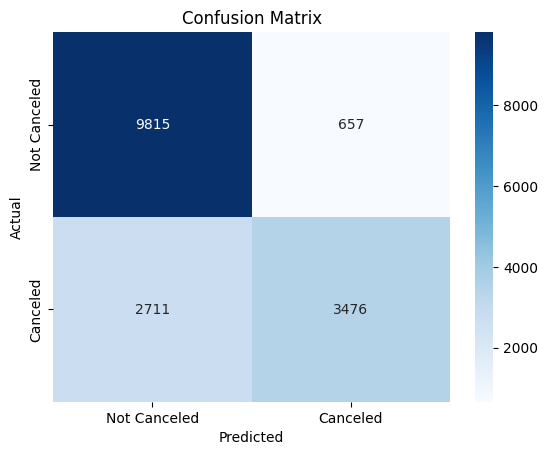

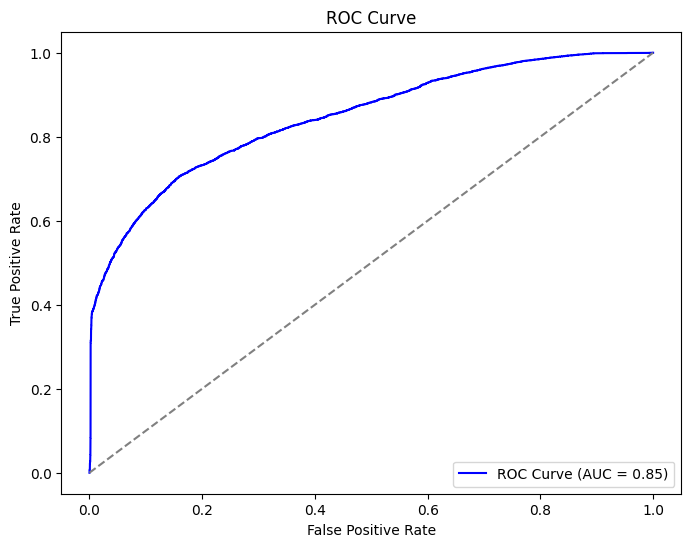


Tuning Hyperparameter untuk KNN...
Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best Parameters for KNN: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan'}

Evaluating KNN...

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70     10472
           1       0.47      0.41      0.43      6187

    accuracy                           0.61     16659
   macro avg       0.57      0.57      0.57     16659
weighted avg       0.60      0.61      0.60     16659


Confusion Matrix:


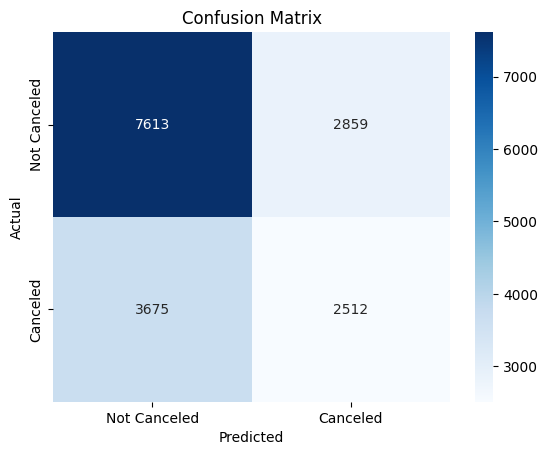

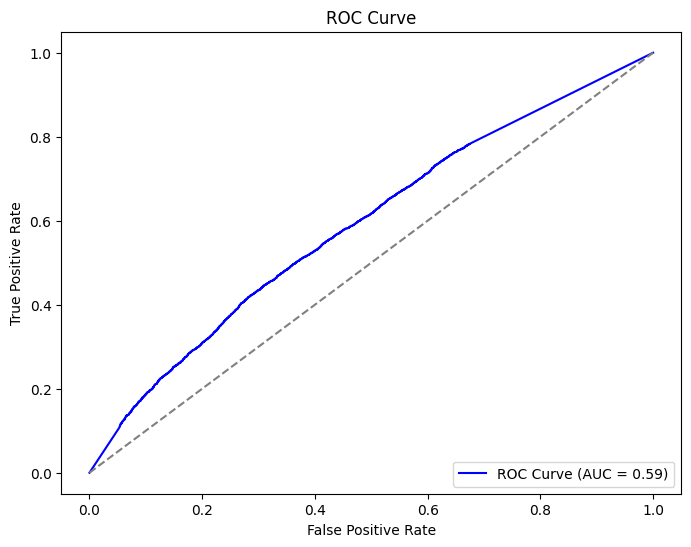


Tuning Hyperparameter untuk Random Forest...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}

Evaluating Random Forest...

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90     10472
           1       0.86      0.75      0.80      6187

    accuracy                           0.86     16659
   macro avg       0.86      0.84      0.85     16659
weighted avg       0.86      0.86      0.86     16659


Confusion Matrix:


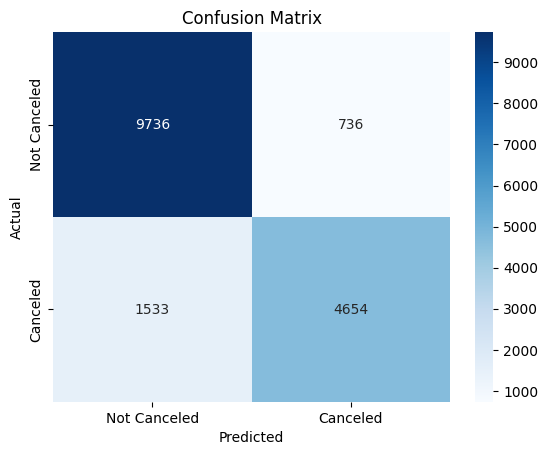

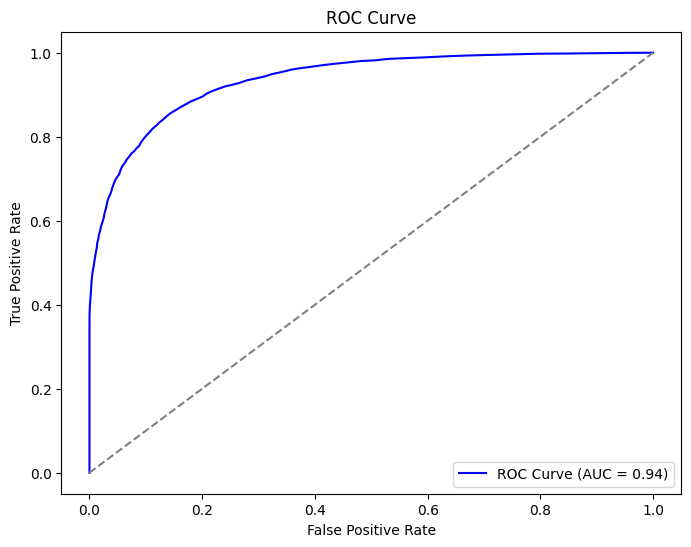

<ipython-input-65-45ddea087902>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


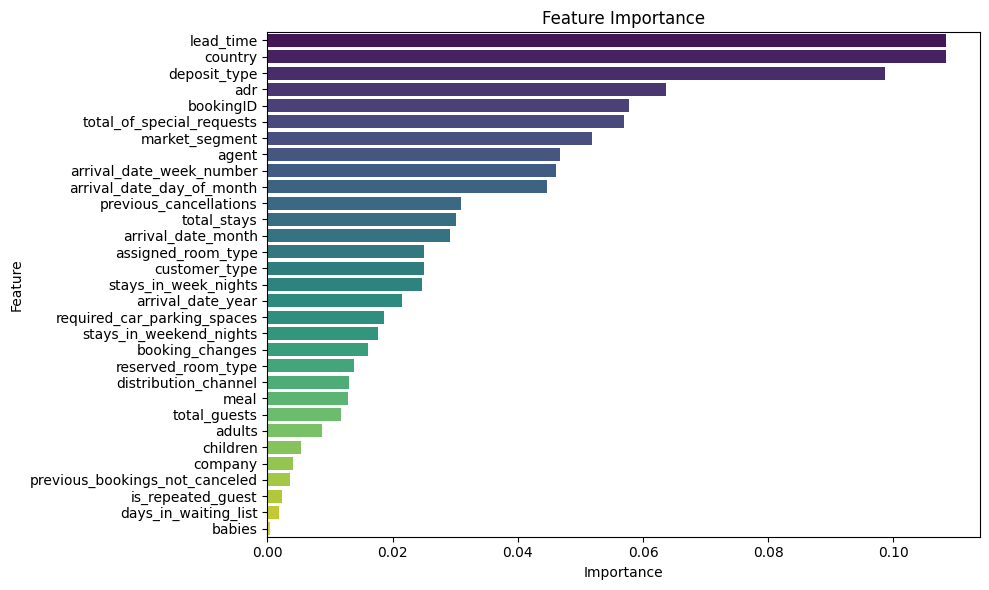


Tuning Hyperparameter untuk Decision Tree...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'gini'}

Evaluating Decision Tree...

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     10472
           1       0.81      0.72      0.76      6187

    accuracy                           0.83     16659
   macro avg       0.82      0.81      0.81     16659
weighted avg       0.83      0.83      0.83     16659


Confusion Matrix:


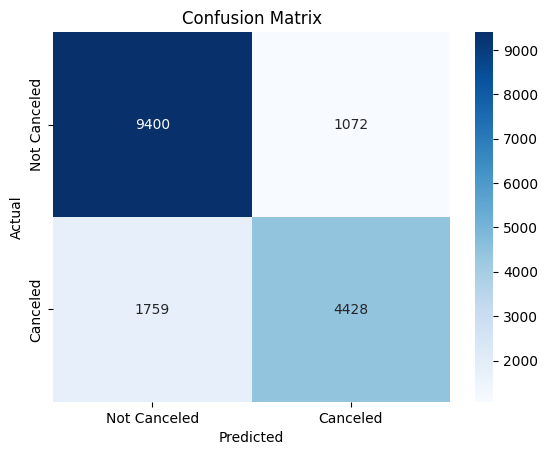

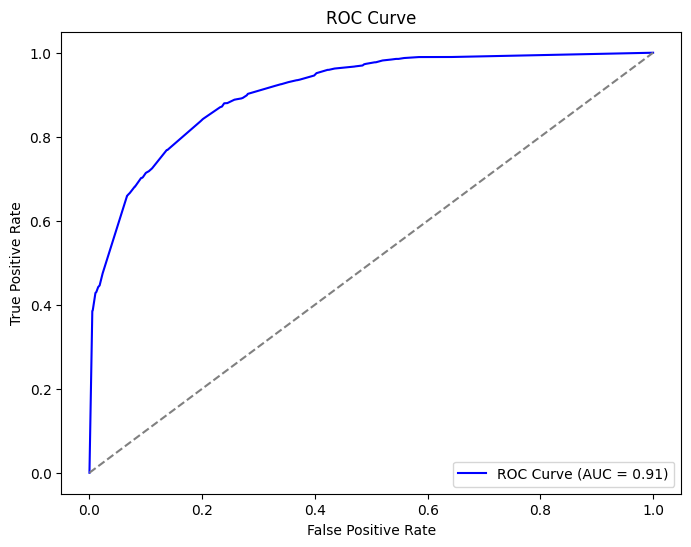

<ipython-input-65-45ddea087902>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


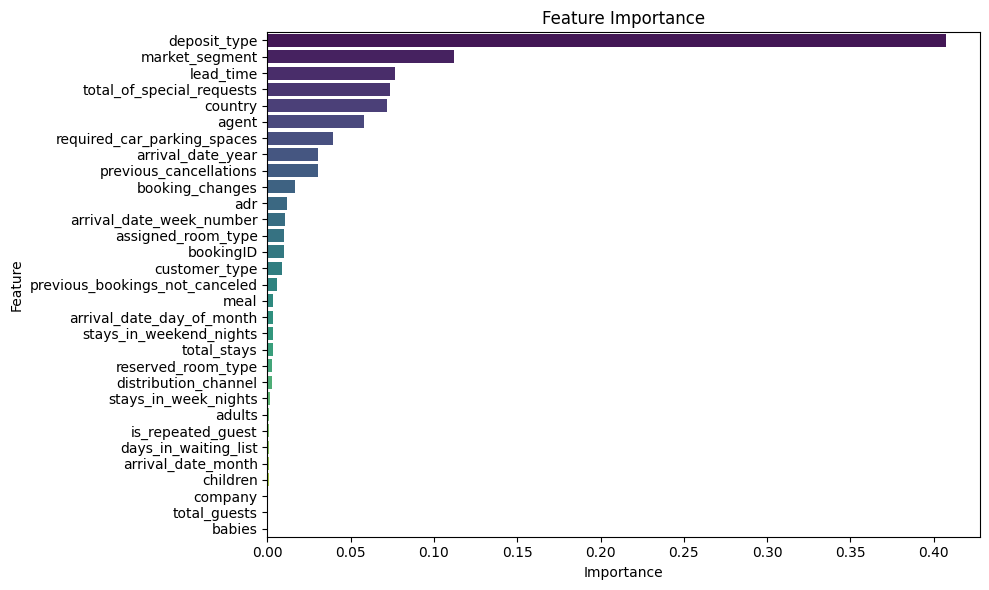


Tuning Hyperparameter untuk XGBoost...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:52:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}

Evaluating XGBoost...

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     10472
           1       0.84      0.79      0.82      6187

    accuracy                           0.87     16659
   macro avg       0.86      0.85      0.86     16659
weighted avg       0.87      0.87      0.87     16659


Confusion Matrix:


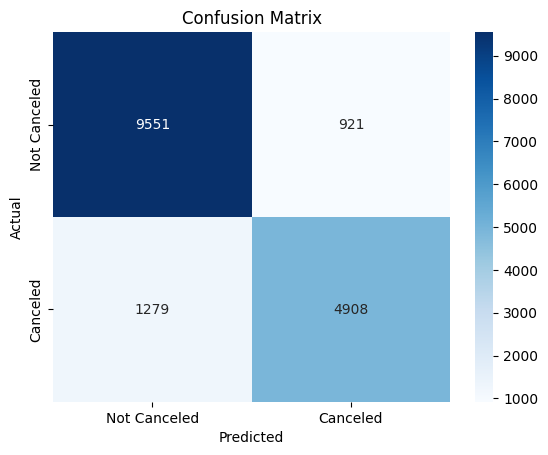

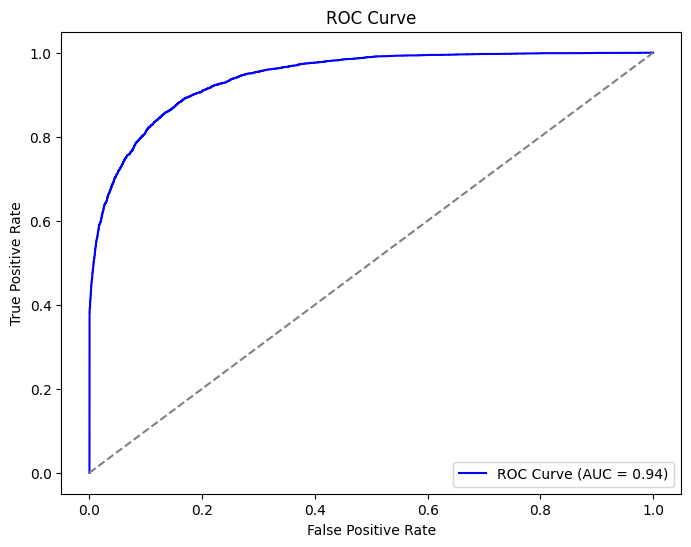

<ipython-input-65-45ddea087902>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


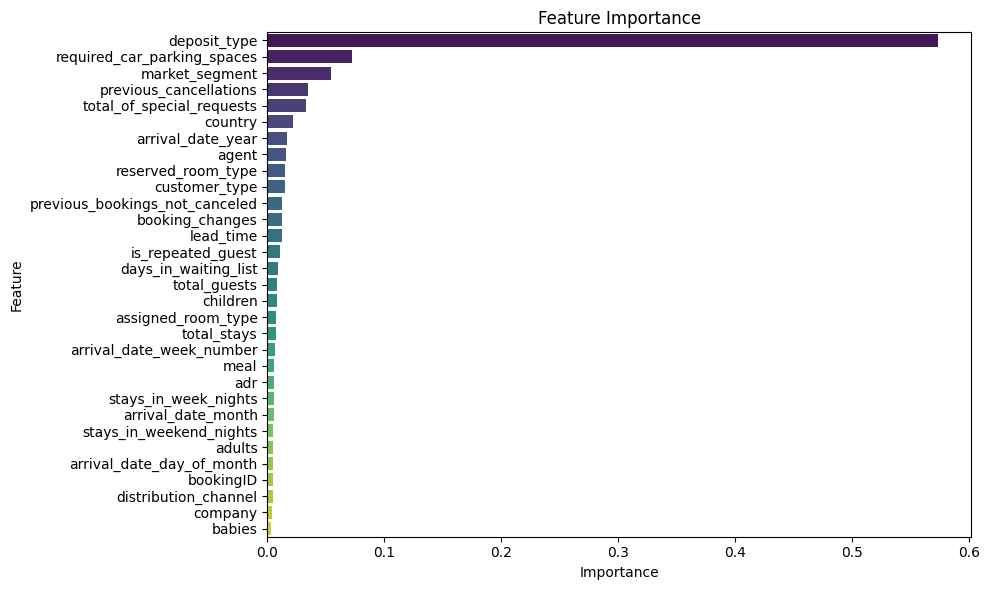

In [65]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression # Importing LogisticRegression here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk evaluasi model setelah tuning
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Metrik Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Canceled", "Canceled"], yticklabels=["Not Canceled", "Canceled"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    if y_proba is not None:
        from sklearn.metrics import roc_curve, auc
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()

# Fungsi untuk menampilkan feature importance (jika didukung)
def show_feature_importance(model, X_train):
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
        features = X_train.columns
        importance_df = pd.DataFrame({"Feature": features, "Importance": importance})
        importance_df = importance_df.sort_values(by="Importance", ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
        plt.title("Feature Importance")
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.tight_layout()
        plt.show()

# Model dan hyperparameter
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['newton-cg', 'lbfgs', 'liblinear']
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "params": {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0]
        }
    }
}

# Subset data untuk mempercepat pelatihan (gunakan 20% data untuk tuning)
X_train_subset = X_train.sample(frac=0.2, random_state=42)
y_train_subset = y_train.loc[X_train_subset.index]

# Loop melalui setiap model
for model_name, model_data in models.items():
    print(f"\nTuning Hyperparameter untuk {model_name}...")

    # Hyperparameter tuning menggunakan RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=model_data["model"],
        param_distributions=model_data["params"],
        n_iter=20,  # Ubah jumlah iterasi untuk mengontrol kecepatan
        cv=3,
        scoring='f1',
        n_jobs=-1,
        verbose=2,
        random_state=42
    )
    random_search.fit(X_train_subset, y_train_subset)

    # Menampilkan hyperparameter terbaik
    print(f"\nBest Parameters for {model_name}: {random_search.best_params_}")

    # Evaluasi model terbaik
    best_model = random_search.best_estimator_
    print(f"\nEvaluating {model_name}...")
    evaluate_model(best_model, X_test, y_test)

    # Tampilkan feature importance jika tersedia
    show_feature_importance(best_model, X_train)


data train


Training Logistic Regression on Training Data...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics on Training Data:
Accuracy: 0.73
F1 Score: 0.56
Recall: 0.46
Precision: 0.72

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81     42044
           1       0.72      0.46      0.56     24590

    accuracy                           0.73     66634
   macro avg       0.73      0.68      0.68     66634
weighted avg       0.73      0.73      0.72     66634



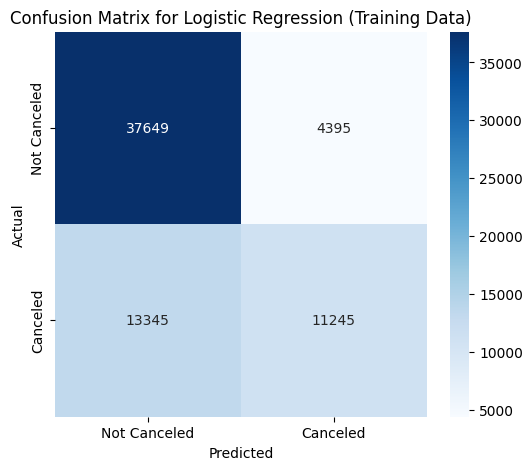

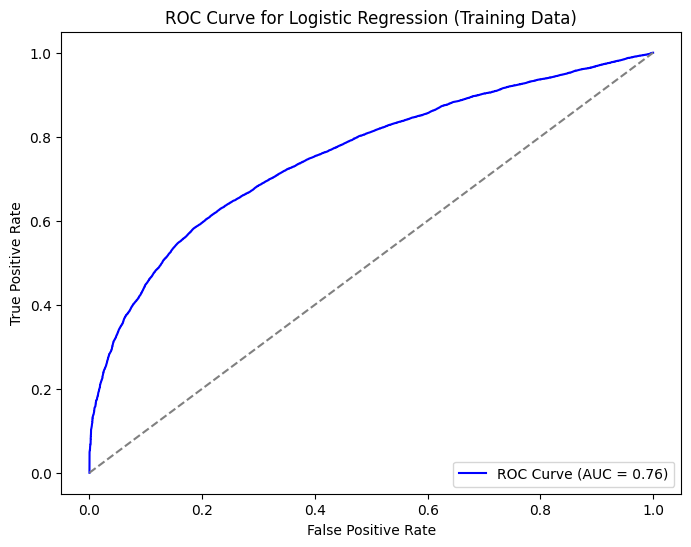

<ipython-input-65-45ddea087902>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


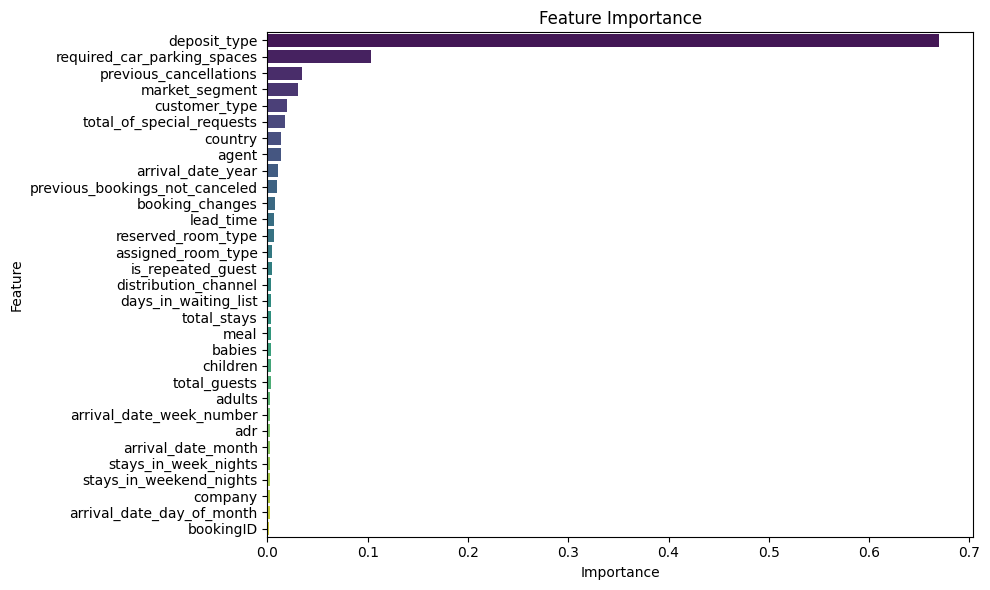


Training KNN on Training Data...
KNN Metrics on Training Data:
Accuracy: 0.75
F1 Score: 0.62
Recall: 0.56
Precision: 0.70

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81     42044
           1       0.70      0.56      0.62     24590

    accuracy                           0.75     66634
   macro avg       0.74      0.71      0.72     66634
weighted avg       0.74      0.75      0.74     66634



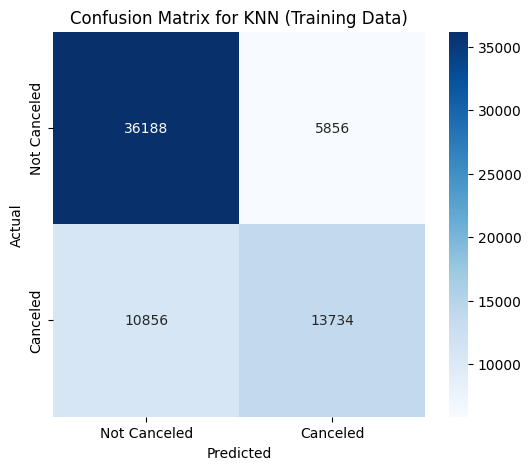

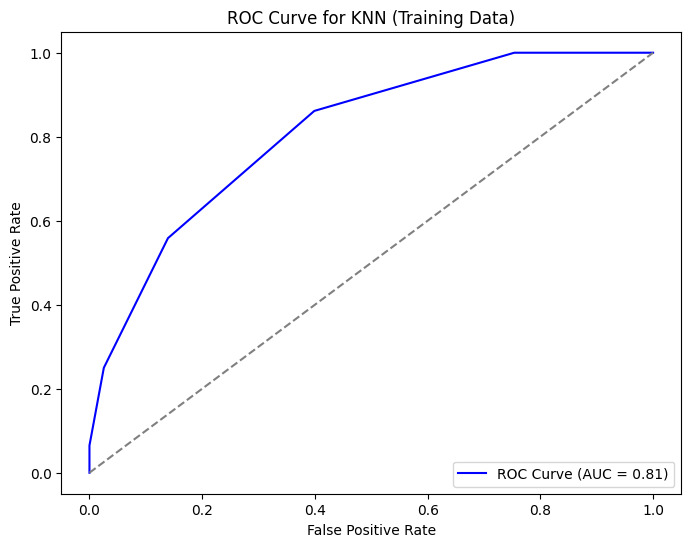

<ipython-input-65-45ddea087902>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


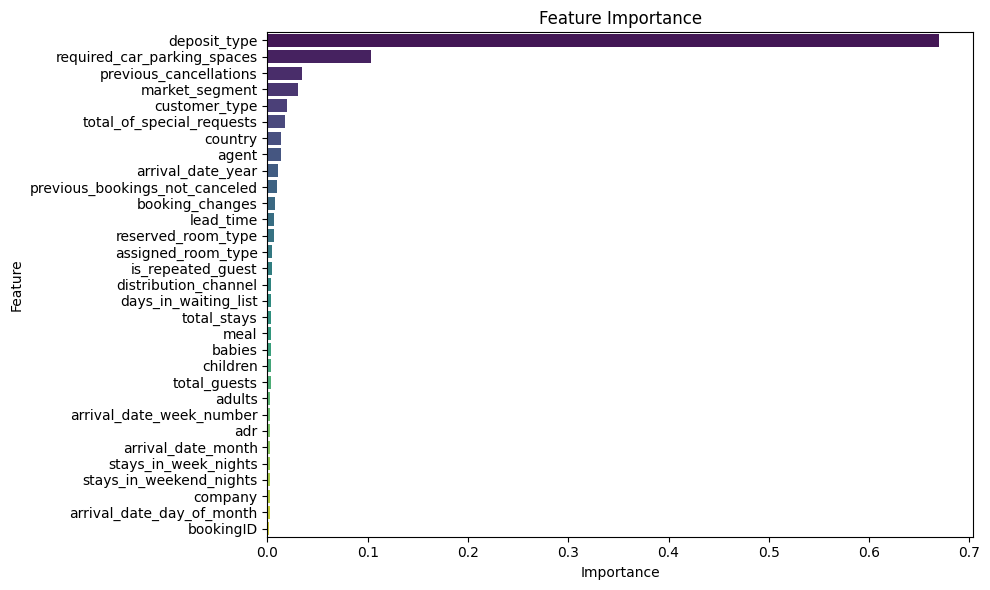


Training Random Forest on Training Data...
Random Forest Metrics on Training Data:
Accuracy: 1.00
F1 Score: 1.00
Recall: 1.00
Precision: 1.00

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42044
           1       1.00      1.00      1.00     24590

    accuracy                           1.00     66634
   macro avg       1.00      1.00      1.00     66634
weighted avg       1.00      1.00      1.00     66634



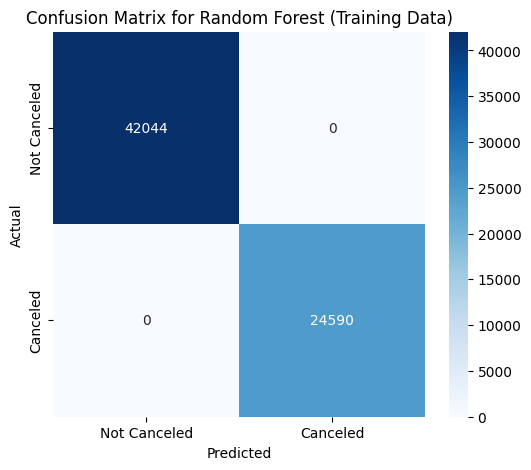

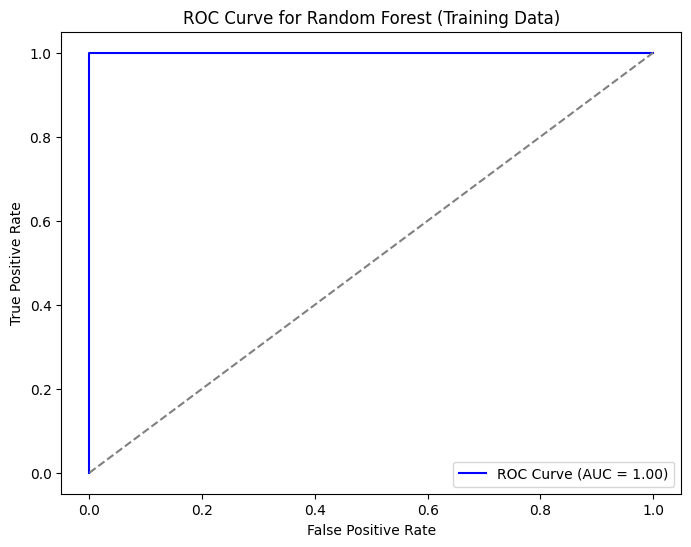

<ipython-input-65-45ddea087902>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


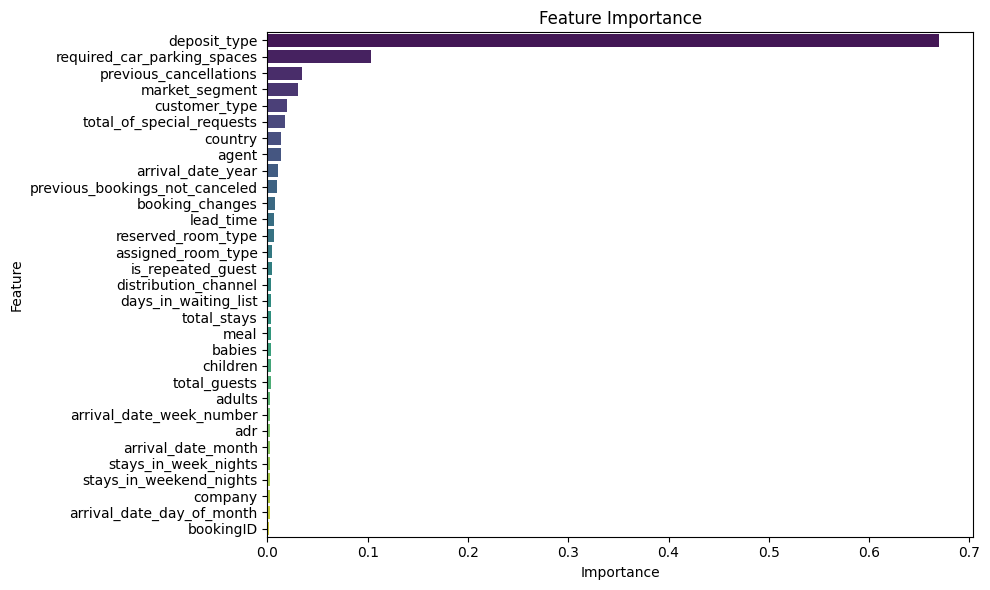


Training Decision Tree on Training Data...
Decision Tree Metrics on Training Data:
Accuracy: 1.00
F1 Score: 1.00
Recall: 1.00
Precision: 1.00

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42044
           1       1.00      1.00      1.00     24590

    accuracy                           1.00     66634
   macro avg       1.00      1.00      1.00     66634
weighted avg       1.00      1.00      1.00     66634



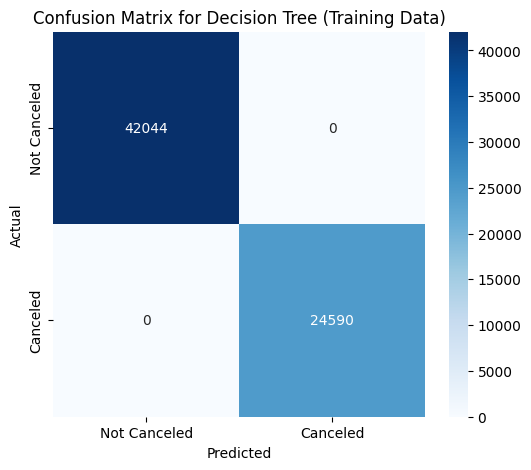

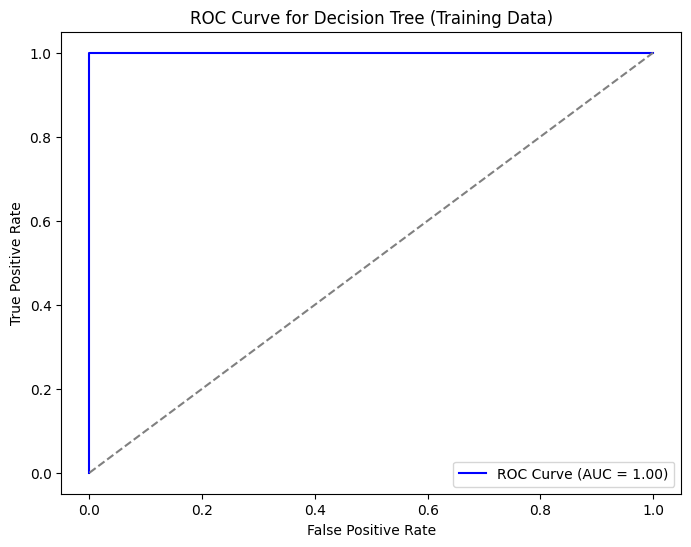

<ipython-input-65-45ddea087902>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


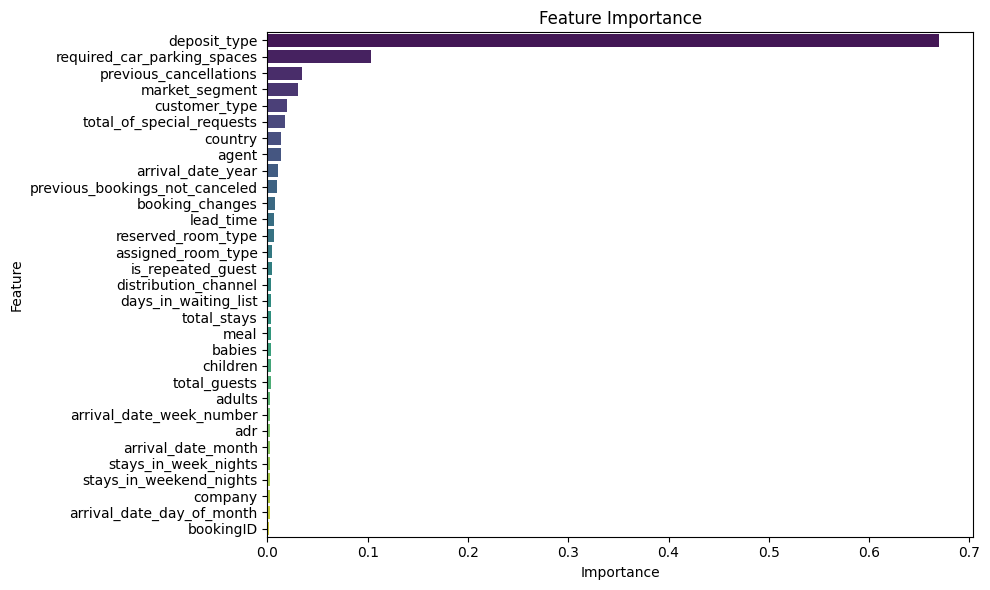


Training XGBoost on Training Data...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:54:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Metrics on Training Data:
Accuracy: 0.90
F1 Score: 0.87
Recall: 0.85
Precision: 0.89

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     42044
           1       0.89      0.85      0.87     24590

    accuracy                           0.90     66634
   macro avg       0.90      0.89      0.90     66634
weighted avg       0.90      0.90      0.90     66634



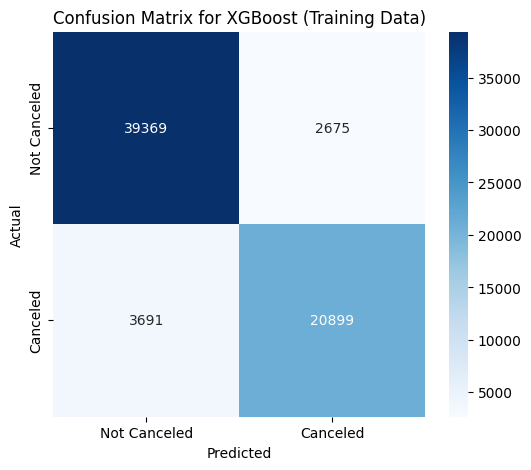

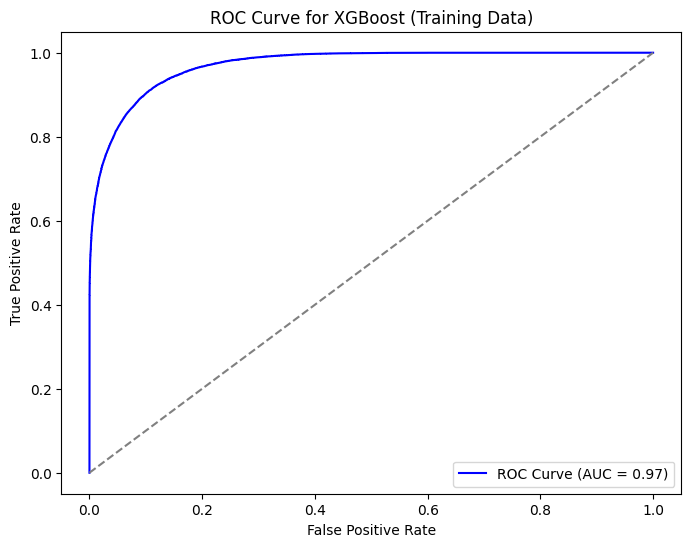

<ipython-input-65-45ddea087902>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


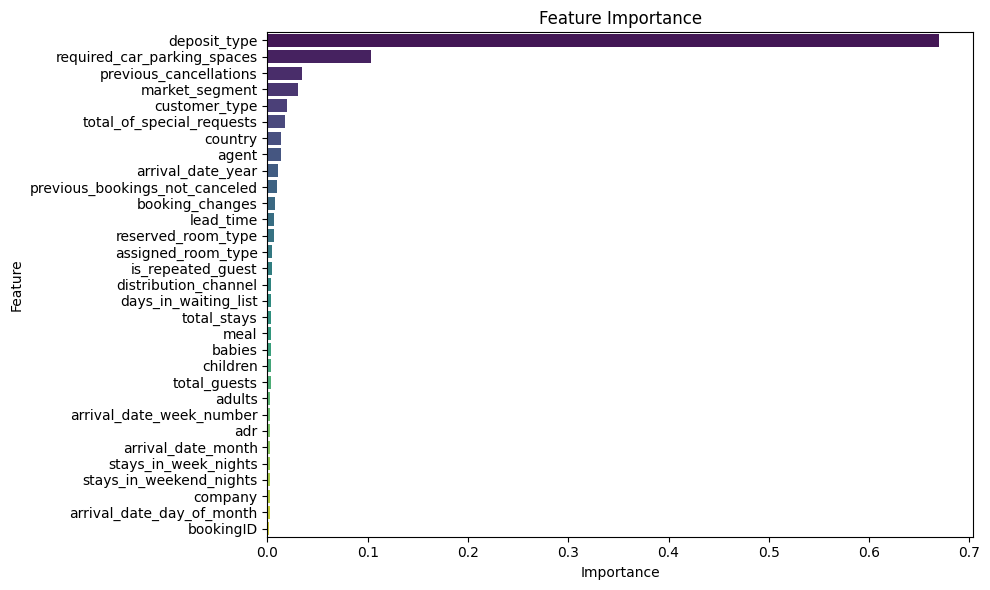

In [66]:
for model_name, model_data in models.items(): # Changed 'model' to 'model_data'
    print(f"\nTraining {model_name} on Training Data...")
    # Latih model
    model_data["model"].fit(X_train, y_train)  # Access the model object using model_data["model"]
    # Prediksi pada data train
    y_train_pred = model_data["model"].predict(X_train) # Access the model object using model_data["model"]
    y_train_proba = model_data["model"].predict_proba(X_train)[:, 1]  # Probabilitas untuk ROC Curve # Access the model object using model_data["model"]

    # Evaluasi Metrik pada Data Train
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)

    print(f"{model_name} Metrics on Training Data:")
    print(f"Accuracy: {train_accuracy:.2f}")
    print(f"F1 Score: {train_f1:.2f}")
    print(f"Recall: {train_recall:.2f}")
    print(f"Precision: {train_precision:.2f}")
    print("\nClassification Report on Training Data:")
    print(classification_report(y_train, y_train_pred))

    # Confusion Matrix pada Data Train
    cm_train = confusion_matrix(y_train, y_train_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Canceled", "Canceled"], yticklabels=["Not Canceled", "Canceled"])
    plt.title(f"Confusion Matrix for {model_name} (Training Data)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve pada Data Train
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
    roc_auc_train = auc(fpr_train, tpr_train)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, color='blue', label=f"ROC Curve (AUC = {roc_auc_train:.2f})")
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f"ROC Curve for {model_name} (Training Data)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

        # Tampilkan feature importance jika tersedia
    show_feature_importance(best_model_train, X_train)


hyperparameter training


Tuning Hyperparameter untuk Logistic Regression pada data train...
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 15 is smaller than n_iter=20. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:43: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



Best Parameters for Logistic Regression (Train): {'solver': 'newton-cg', 'C': 100}

Evaluating Logistic Regression pada data training...

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.86     42044
           1       0.85      0.56      0.67     24590

    accuracy                           0.80     66634
   macro avg       0.82      0.75      0.76     66634
weighted avg       0.81      0.80      0.79     66634


Confusion Matrix:


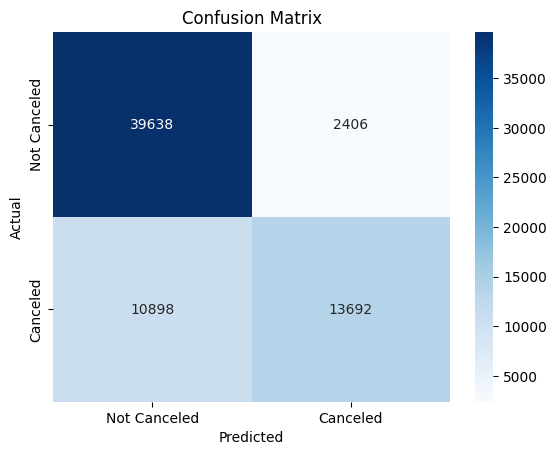

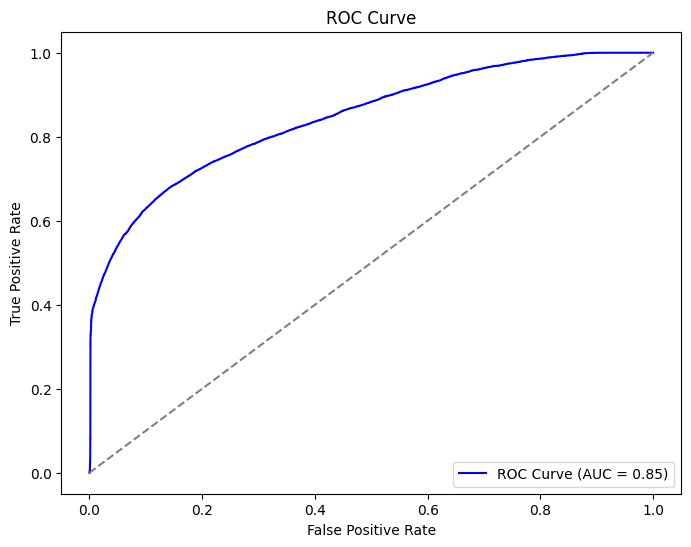


Tuning Hyperparameter untuk KNN pada data train...
Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best Parameters for KNN (Train): {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan'}

Evaluating KNN pada data training...

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42044
           1       1.00      1.00      1.00     24590

    accuracy                           1.00     66634
   macro avg       1.00      1.00      1.00     66634
weighted avg       1.00      1.00      1.00     66634


Confusion Matrix:


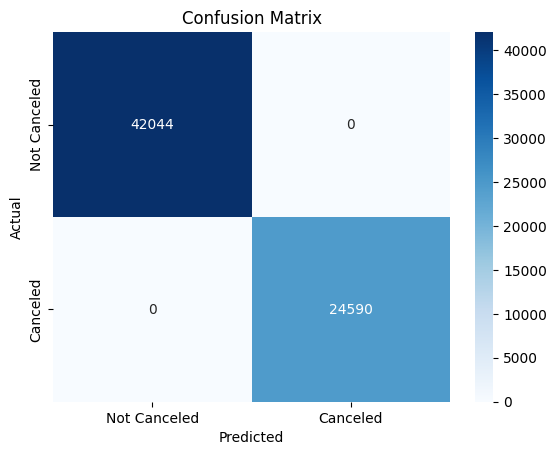

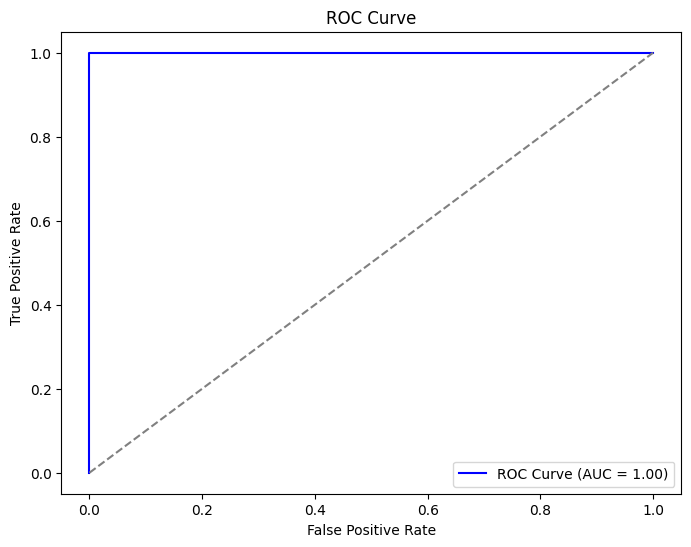


Tuning Hyperparameter untuk Random Forest pada data train...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters for Random Forest (Train): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}

Evaluating Random Forest pada data training...

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42044
           1       1.00      1.00      1.00     24590

    accuracy                           1.00     66634
   macro avg       1.00      1.00      1.00     66634
weighted avg       1.00      1.00      1.00     66634


Confusion Matrix:


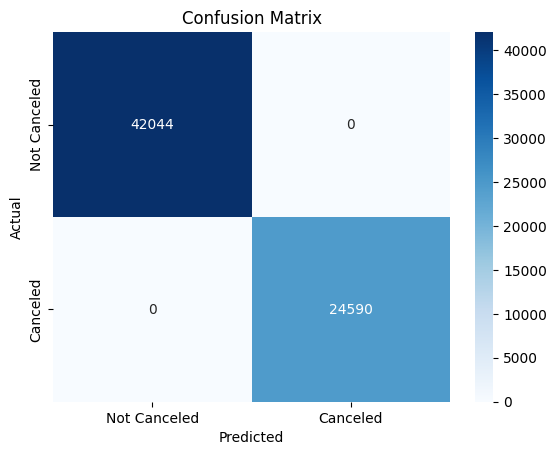

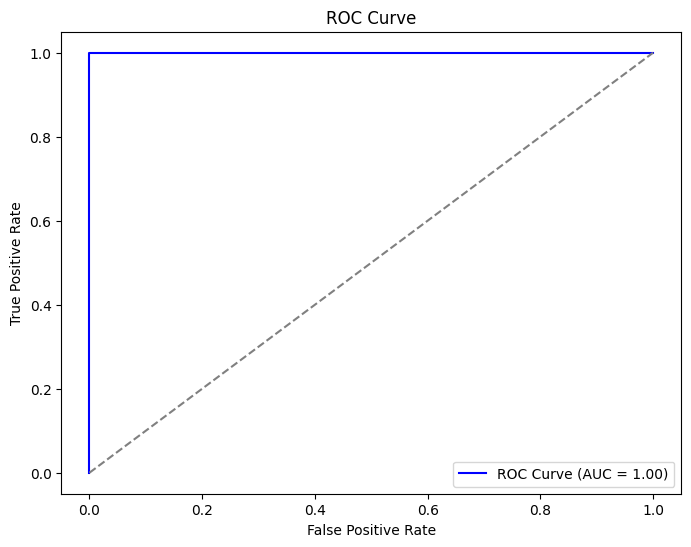

<ipython-input-65-45ddea087902>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


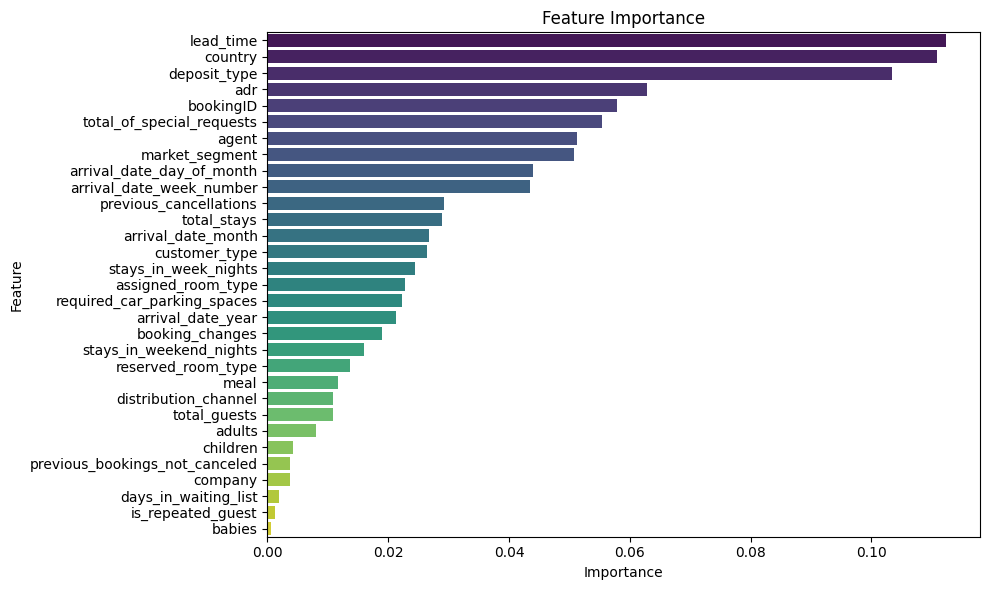


Tuning Hyperparameter untuk Decision Tree pada data train...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters for Decision Tree (Train): {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy'}

Evaluating Decision Tree pada data training...

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     42044
           1       0.89      0.89      0.89     24590

    accuracy                           0.92     66634
   macro avg       0.91      0.91      0.91     66634
weighted avg       0.92      0.92      0.92     66634


Confusion Matrix:


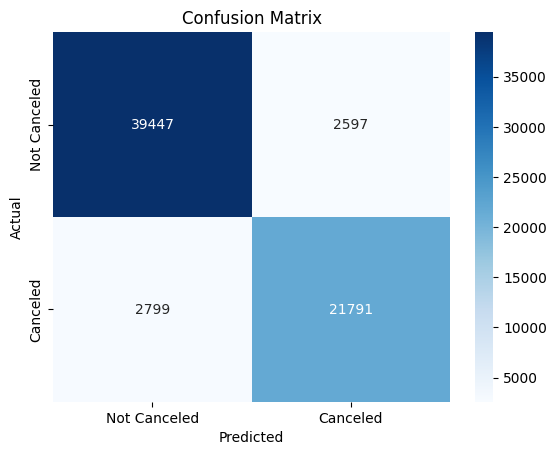

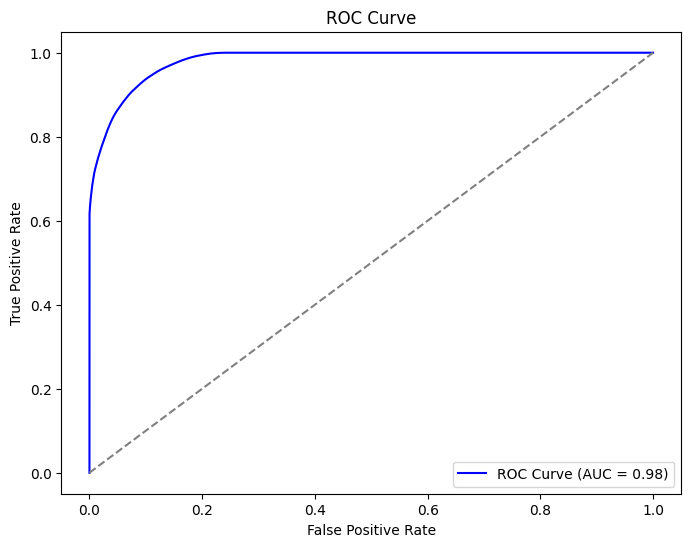

<ipython-input-65-45ddea087902>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


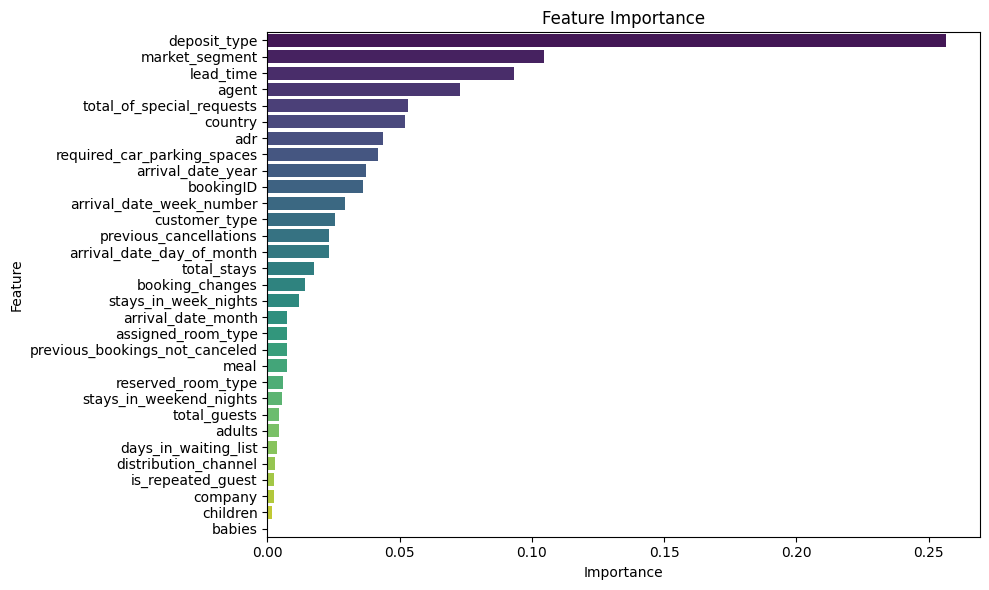


Tuning Hyperparameter untuk XGBoost pada data train...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:31:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Parameters for XGBoost (Train): {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8}

Evaluating XGBoost pada data training...

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     42044
           1       0.92      0.90      0.91     24590

    accuracy                           0.93     66634
   macro avg       0.93      0.93      0.93     66634
weighted avg       0.93      0.93      0.93     66634


Confusion Matrix:


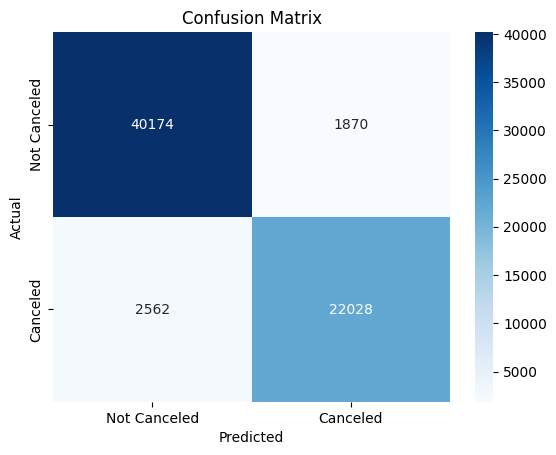

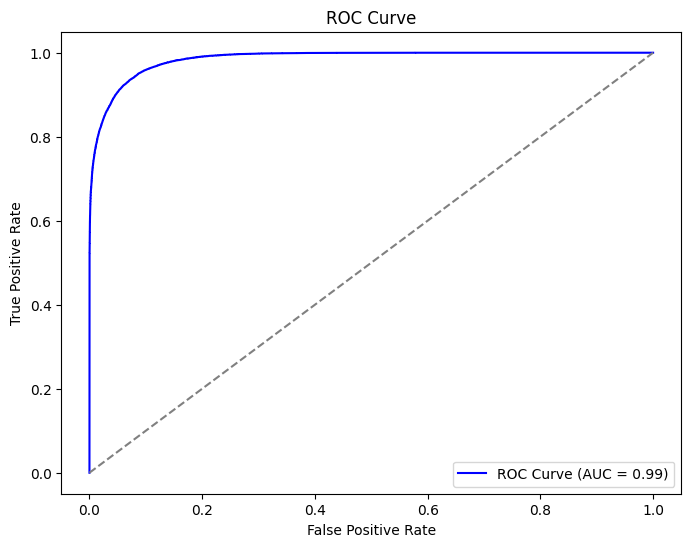

<ipython-input-65-45ddea087902>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


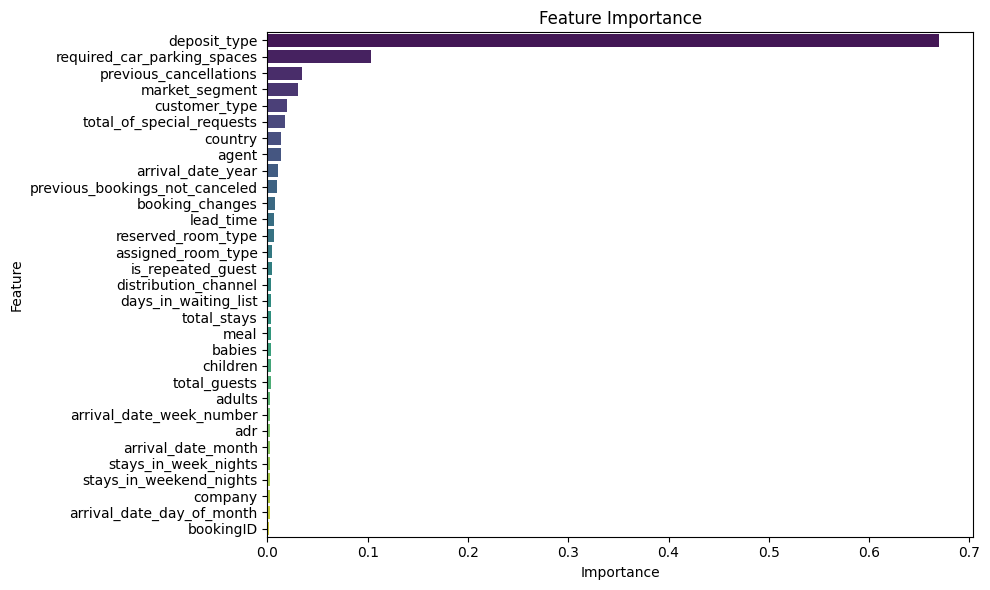

In [67]:
for model_name, model_data in models.items():
    print(f"\nTuning Hyperparameter untuk {model_name} pada data train...")

    # Hyperparameter tuning menggunakan RandomizedSearchCV
    random_search_train = RandomizedSearchCV(
        estimator=model_data["model"],
        param_distributions=model_data["params"],
        n_iter=20,  # Ubah jumlah iterasi untuk mengontrol waktu
        cv=3,
        scoring='f1',
        n_jobs=-1,
        verbose=2,
        random_state=42
    )

    # Fitting RandomizedSearchCV pada data training penuh
    random_search_train.fit(X_train, y_train)

    # Menampilkan hyperparameter terbaik
    print(f"\nBest Parameters for {model_name} (Train): {random_search_train.best_params_}")

    # Evaluasi model terbaik pada data training
    best_model_train = random_search_train.best_estimator_
    print(f"\nEvaluating {model_name} pada data training...")
    evaluate_model(best_model_train, X_train, y_train)

    # Tampilkan feature importance jika tersedia
    show_feature_importance(best_model_train, X_train)

In [68]:
!pip install ace_tools

In [77]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load dataset
X = data_numerical.drop(columns=['is_canceled'], axis=1)  # Fitur
y = data_numerical['is_canceled']  # Target (kolom 'is_canceled')

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset ke data train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# K-Fold Cross Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List model yang akan diuji
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
}

# Loop untuk mengevaluasi setiap model
cv_results = {}
metrics = {
    "Accuracy": "accuracy",
    "Precision": make_scorer(precision_score, average='macro'),
    "Recall": make_scorer(recall_score, average='macro'),
    "F1-Score": make_scorer(f1_score, average='macro'),
}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    scores = {}
    for metric_name, scoring in metrics.items():
        score = cross_val_score(model, X_scaled, y, cv=kfold, scoring=scoring, n_jobs=-1).mean()
        scores[metric_name] = score
    cv_results[model_name] = scores

# Tampilkan hasil
cv_results_df = pd.DataFrame(cv_results).T

# Tampilkan hasil akhir
print("\nCross-Validation Results:")
print(cv_results_df)


Evaluating Logistic Regression...
Evaluating K-Nearest Neighbors...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating XGBoost...

Cross-Validation Results:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.799815   0.816409  0.749701  0.764393
K-Nearest Neighbors  0.808183   0.796810  0.785927  0.790512
Decision Tree        0.840635   0.828606  0.830311  0.829432
Random Forest        0.886725   0.885047  0.869430  0.876073
XGBoost              0.880098   0.874180  0.866569  0.870056



Evaluating Logistic Regression...

Confusion Matrix for Logistic Regression:
[[9815  657]
 [2705 3482]]


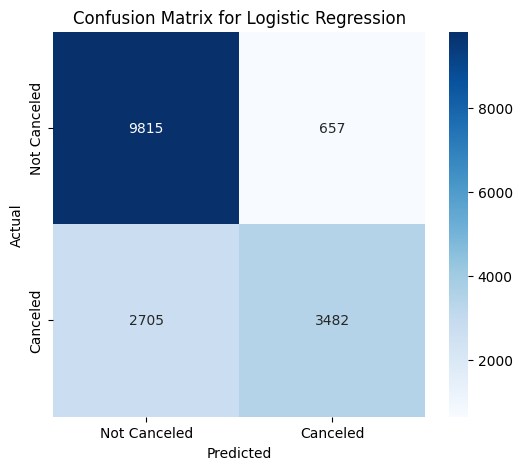

ROC-AUC for Logistic Regression: 0.85


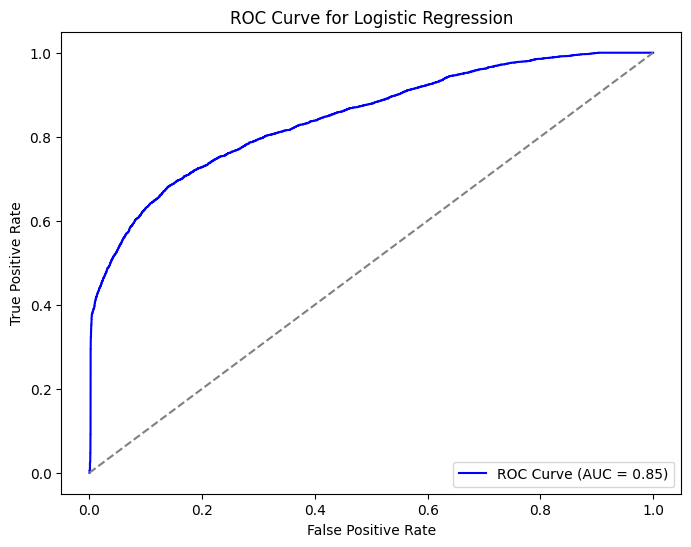


Evaluating K-Nearest Neighbors...

Confusion Matrix for K-Nearest Neighbors:
[[9068 1404]
 [1786 4401]]


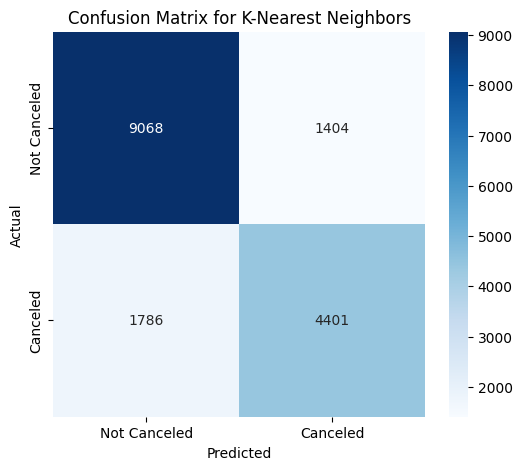

ROC-AUC for K-Nearest Neighbors: 0.87


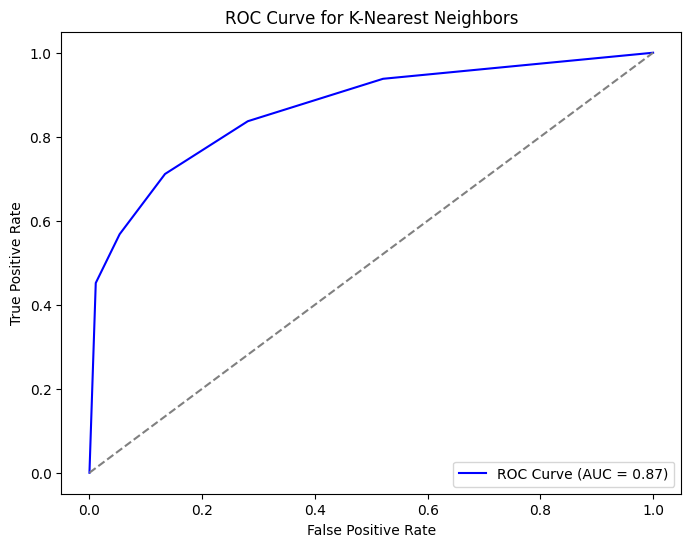


Evaluating Decision Tree...

Confusion Matrix for Decision Tree:
[[9027 1445]
 [1268 4919]]


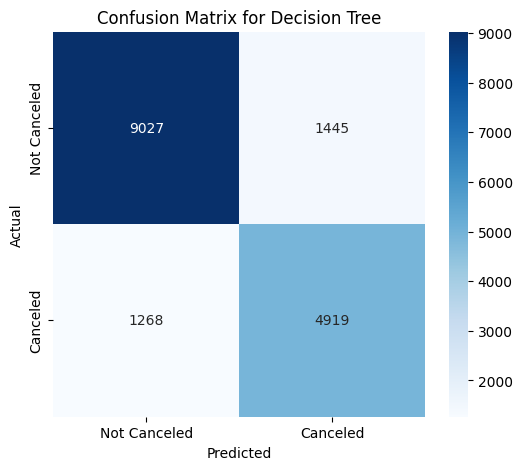

ROC-AUC for Decision Tree: 0.83


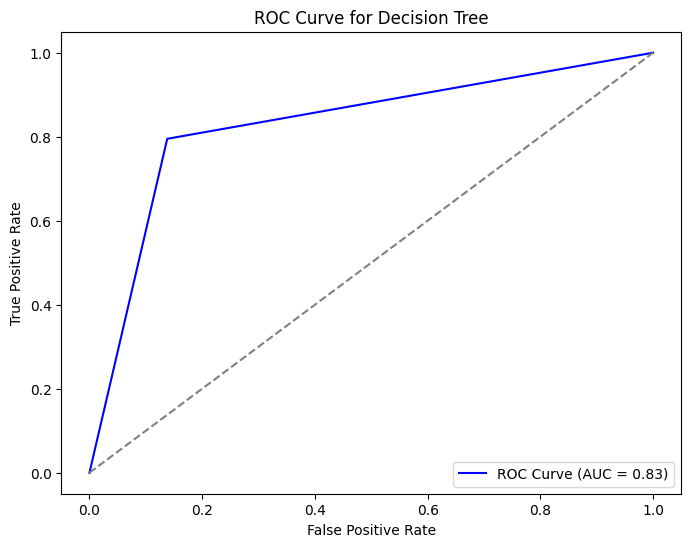


Feature Importance for Decision Tree:
                           Feature  Importance
20                    deposit_type    0.233783
0                        lead_time    0.099076
12                  market_segment    0.067823
11                         country    0.065667
28                       bookingID    0.064473
21                           agent    0.059712
25                             adr    0.053058
27       total_of_special_requests    0.052359
3         arrival_date_week_number    0.041152
4        arrival_date_day_of_month    0.039680
1                arrival_date_year    0.027167
26     required_car_parking_spaces    0.025336
30                     total_stays    0.022495
6             stays_in_week_nights    0.018673
15          previous_cancellations    0.017488
24                   customer_type    0.015280
19                 booking_changes    0.014290
18              assigned_room_type    0.012133
5          stays_in_weekend_nights    0.011512
2               arriv

<ipython-input-78-b135eb2c5887>:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


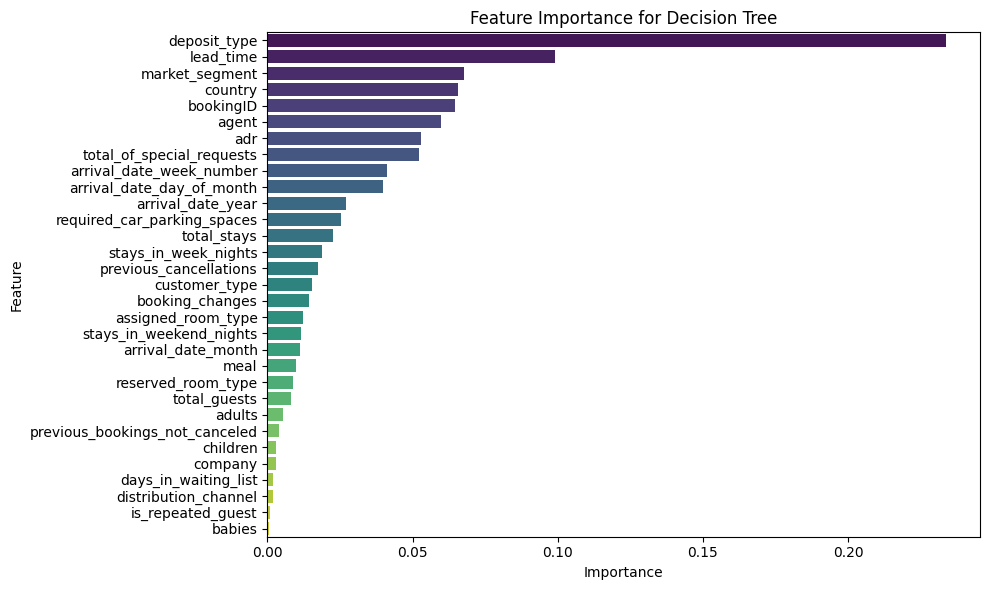


Evaluating Random Forest...

Confusion Matrix for Random Forest:
[[9772  700]
 [1210 4977]]


ROC-AUC for Random Forest: 0.95


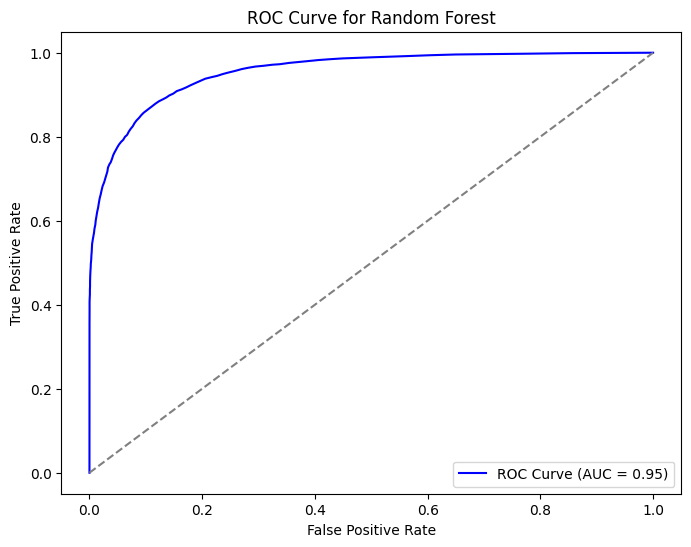


Feature Importance for Random Forest:
                           Feature  Importance
0                        lead_time    0.112346
11                         country    0.110866
20                    deposit_type    0.103380
25                             adr    0.062882
28                       bookingID    0.057928
27       total_of_special_requests    0.055379
21                           agent    0.051299
12                  market_segment    0.050677
4        arrival_date_day_of_month    0.043950
3         arrival_date_week_number    0.043517
15          previous_cancellations    0.029295
30                     total_stays    0.028847
2               arrival_date_month    0.026772
24                   customer_type    0.026466
6             stays_in_week_nights    0.024411
18              assigned_room_type    0.022696
26     required_car_parking_spaces    0.022290
1                arrival_date_year    0.021336
19                 booking_changes    0.019031
5          stays_in_w

<ipython-input-78-b135eb2c5887>:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


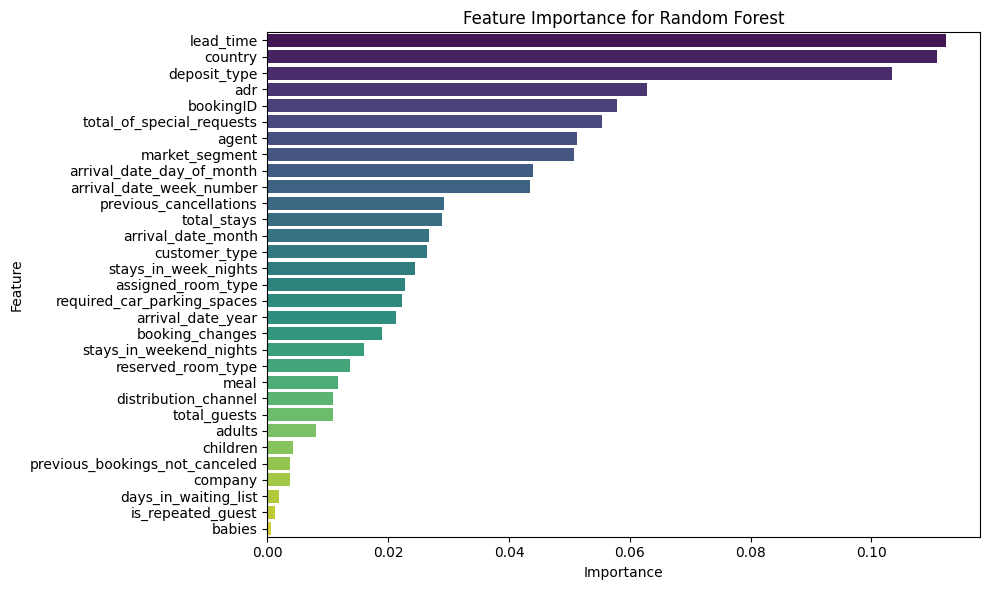


Evaluating XGBoost...

Confusion Matrix for XGBoost:
[[9617  855]
 [1122 5065]]


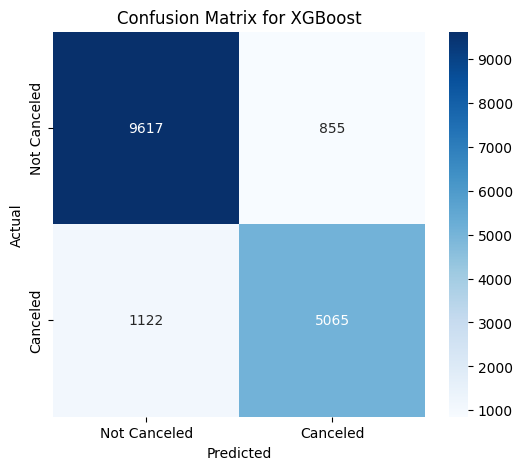

ROC-AUC for XGBoost: 0.95


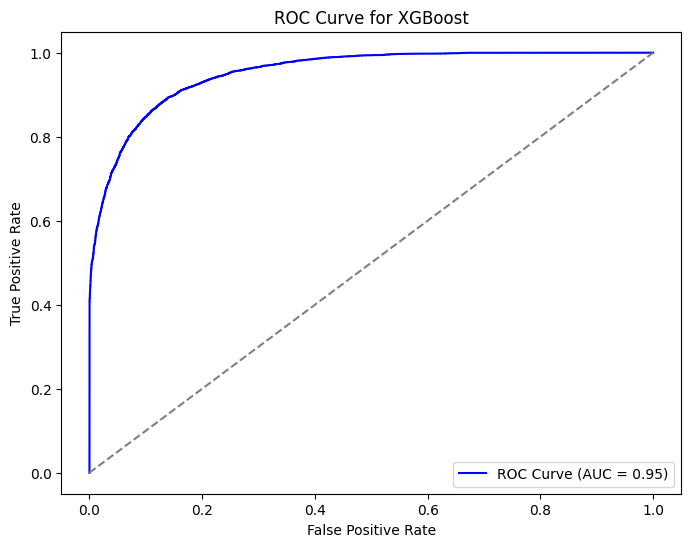


Feature Importance for XGBoost:
                           Feature  Importance
20                    deposit_type    0.631517
26     required_car_parking_spaces    0.084696
12                  market_segment    0.043103
15          previous_cancellations    0.033132
27       total_of_special_requests    0.030028
11                         country    0.019683
24                   customer_type    0.017128
21                           agent    0.014495
1                arrival_date_year    0.013126
16  previous_bookings_not_canceled    0.012203
19                 booking_changes    0.011600
0                        lead_time    0.009820
17              reserved_room_type    0.008551
14               is_repeated_guest    0.007606
18              assigned_room_type    0.006943
13            distribution_channel    0.005470
30                     total_stays    0.005353
8                         children    0.004350
7                           adults    0.004321
10                         

<ipython-input-78-b135eb2c5887>:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


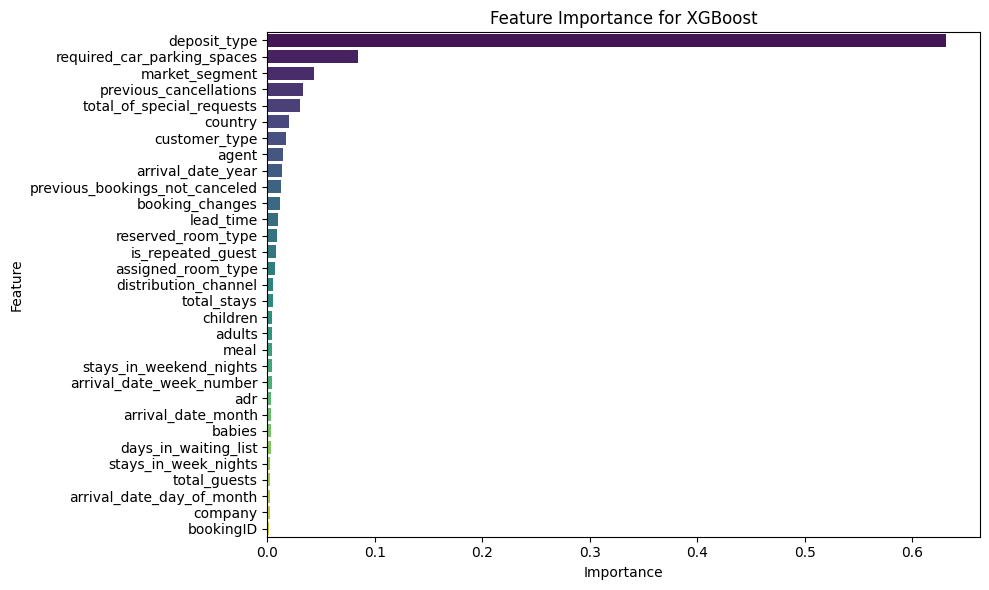


Cross-Validation Results:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.799815   0.816409  0.749701  0.764393
K-Nearest Neighbors  0.808183   0.796810  0.785927  0.790512
Decision Tree        0.840635   0.828606  0.830311  0.829432
Random Forest        0.886725   0.885047  0.869430  0.876073
XGBoost              0.880098   0.874180  0.866569  0.870056


In [78]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import (
    make_scorer,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
X = data_numerical.drop(columns=['is_canceled'], axis=1)  # Fitur
y = data_numerical['is_canceled']  # Target (kolom 'is_canceled')

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset ke data train dan test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# K-Fold Cross Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List model yang akan diuji
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
}

# Loop untuk mengevaluasi setiap model
cv_results = {}
metrics = {
    "Accuracy": "accuracy",
    "Precision": make_scorer(precision_score, average='macro'),
    "Recall": make_scorer(recall_score, average='macro'),
    "F1-Score": make_scorer(f1_score, average='macro'),
}

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    scores = {}
    for metric_name, scoring in metrics.items():
        score = cross_val_score(model, X_scaled, y, cv=kfold, scoring=scoring, n_jobs=-1).mean()
        scores[metric_name] = score
    cv_results[model_name] = scores

    # Latih model pada data train untuk Confusion Matrix, ROC-AUC, dan Feature Importance
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix for {model_name}:")
    print(cm)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Canceled", "Canceled"], yticklabels=["Not Canceled", "Canceled"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve and AUC
    if y_proba is not None:
        roc_auc = roc_auc_score(y_test, y_proba)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        print(f"ROC-AUC for {model_name}: {roc_auc:.2f}")
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.title(f"ROC Curve for {model_name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.show()

    # Feature Importance
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
        features = X.columns
        importance_df = pd.DataFrame({"Feature": features, "Importance": importance})
        importance_df = importance_df.sort_values(by="Importance", ascending=False)

        print(f"\nFeature Importance for {model_name}:")
        print(importance_df)
        plt.figure(figsize=(10, 6))
        sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
        plt.title(f"Feature Importance for {model_name}")
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.tight_layout()
        plt.show()

# Tampilkan hasil cross-validation
cv_results_df = pd.DataFrame(cv_results).T

# Tampilkan hasil akhir
print("\nCross-Validation Results:")
print(cv_results_df)


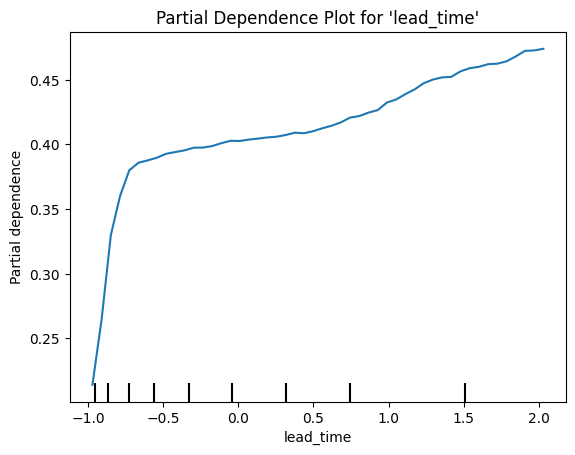

In [79]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
import matplotlib.pyplot as plt

# Pastikan fitur 'lead_time' ada di dataset
feature_to_plot = 'lead_time'

# Index dari fitur 'lead_time' dalam dataset
feature_index = X.columns.get_loc(feature_to_plot)

# Pastikan model Random Forest telah dilatih
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Partial Dependence Plot untuk fitur 'lead_time'
pdp_result = partial_dependence(
    random_forest_model,
    X=X_train,
    features=[feature_index],
    grid_resolution=50
)

# Visualisasi Partial Dependence Plot
PartialDependenceDisplay.from_estimator(
    random_forest_model,
    X_train,
    features=[feature_index],
    feature_names=X.columns,
    grid_resolution=50
)
plt.title("Partial Dependence Plot for 'lead_time'")
plt.show()